## Lab 01 Step 00 : Importing Packages

In [9]:
#0.Importing required packages 
import pandas as pd
import matplotlib.pyplot as plt #(plotin histograms in cell #3)
import numpy as np
from scipy.stats import kde
from tabulate import tabulate
import scipy.stats as stats
import scipy
import warnings
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names
import matplotlib
import sys
import traceback

## Lab 01 Step 01 : Choosing subsample

In [2]:
#1.Reading Data and printing head
energydata = pd.read_csv("./energydata_complete.csv")
energydata.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11-01-2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11-01-2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11-01-2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,11-01-2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,11-01-2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
#2.Creating subsamples
#2.1.Choosing five continous colomns
sample_energydata=energydata[[ 'T2', 'RH_2' ,'T5','T6','T_out']]
df_sample_colomn_energydata = pd.DataFrame(sample_energydata)

##############################

#2.Creating subsamples
#2.1.Choosing five continous colomns
#2.2. Randomly choosing rows (50% from the original data. original samples 19,735 Rows)
df_sample_colomn_energydata = pd.DataFrame(sample_energydata)
df_sample_energydata=df_sample_colomn_energydata.sample(frac = 0.5)

## Lab 01 Step 02 Part 01: Non-parametric estimation of PDF in form of histogram 

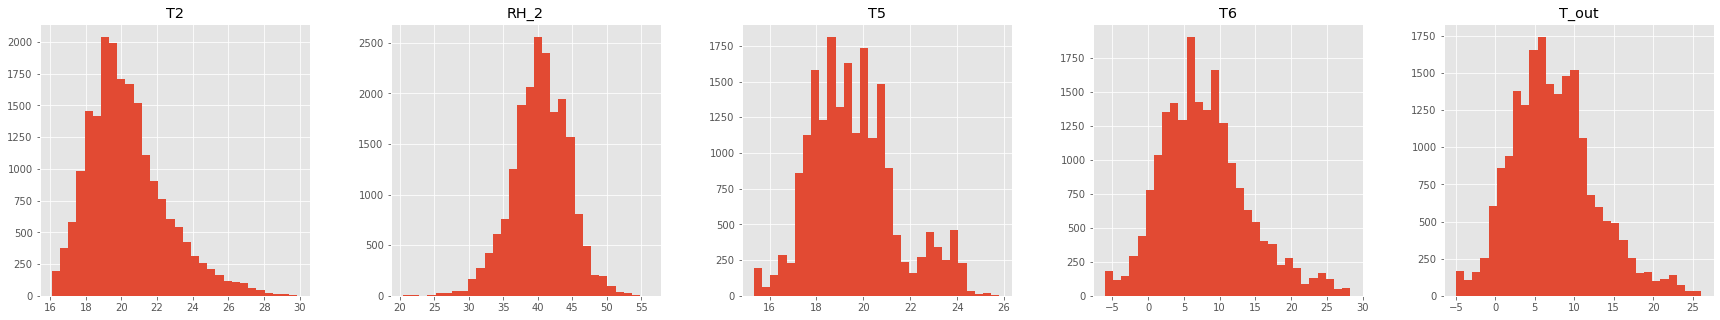

In [6]:
#3.For each variable: non-parametric estimation of PDF in form of histogram and using kernel density function (ploted next to each other)
fig, axes = plt.subplots(len(df_sample_colomn_energydata.columns)// 5,5, figsize=(30, 5))
for col, axis in zip(df_sample_colomn_energydata.columns, axes):
    df_sample_colomn_energydata.hist(column = col, bins = 30, ax=axis)

## Lab 01 Step 02 Part 02: Non-parametric estimation of PDF kernel density function (continous RV)

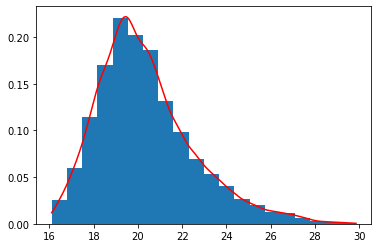

In [6]:
col_App = df_sample_colomn_energydata[df_sample_colomn_energydata.columns[0]].to_numpy()
density = kde.gaussian_kde(col_App)
xgrid = np.linspace(col_App.min(), col_App.max(),500)
ygrid=density.evaluate(xgrid)
plt.hist(col_App, bins=20,density=True, stacked=True)
plt.plot(xgrid, ygrid, 'r-')

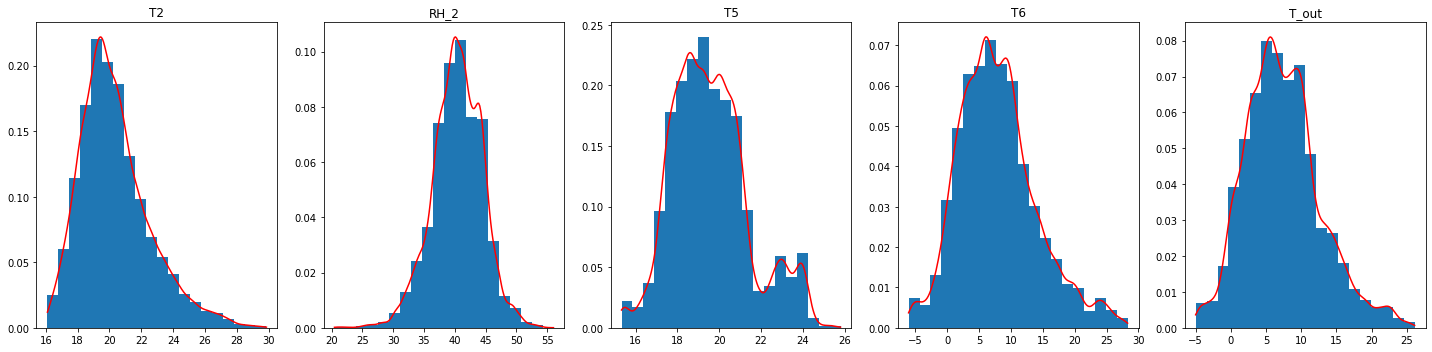

In [8]:
fig, axs = plt.subplots(len(df_sample_colomn_energydata.columns)// 5,5, figsize=(20, 5))
i=0
for ax in axs.ravel():
    col=df_sample_colomn_energydata[df_sample_colomn_energydata.columns[i]].to_numpy()
    density = kde.gaussian_kde(col)
    xgrid = np.linspace(col.min(), col.max(), 200)
    ax.hist(col, bins=20,density=True, stacked=True)
    ax.plot(xgrid, density(xgrid), 'r-')
    ax.set_title(df_sample_colomn_energydata.columns[i])
    if (i!=4) :
        i+=1
plt.tight_layout()

## Lab 01 Step 03 : Estimation of order statistics and representing them as “box with whiskers” plot.

In [7]:
#03.01 function to type the labels of the order statics parameters
def make_labels(ax, boxplot):

    # Grab the relevant Line2D instances from the boxplot dictionary
    iqr = boxplot['boxes'][0]
    caps = boxplot['caps']
    med = boxplot['medians'][0]
    fly = boxplot['fliers'][0]

    # The x position of the median line
    xpos = med.get_xdata()

    # Lets make the text have a horizontal offset which is some 
    # fraction of the width of the box
    xoff = 0.10 * (xpos[1] - xpos[0])

    # The x position of the labels
    xlabel = xpos[1] + xoff

    # The median is the y-position of the median line
    median = med.get_ydata()[1]

    # The 25th and 75th percentiles are found from the
    # top and bottom (max and min) of the box
    pc25 = iqr.get_ydata().min()
    pc75 = iqr.get_ydata().max()

    # The caps give the vertical position of the ends of the whiskers
    capbottom = caps[0].get_ydata()[0]
    captop = caps[1].get_ydata()[0]

    # Make some labels on the figure using the values derived above
    ax.text(xlabel, median,
            'Median = {:6.3g}'.format(median), va='center')
    ax.text(xlabel, pc25,
            '25th percentile = {:6.3g}'.format(pc25), va='center')
    ax.text(xlabel, pc75,
            '75th percentile = {:6.3g}'.format(pc75), va='center')
    ax.text(xlabel, capbottom,
            'Bottom cap = {:6.3g}'.format(capbottom), va='center')
    ax.text(xlabel, captop,
            'Top cap = {:6.3g}'.format(captop), va='center')
    return [median,pc25,pc75,capbottom,captop]

[6.92, 3.67, 10.4, -5.0, 20.4]

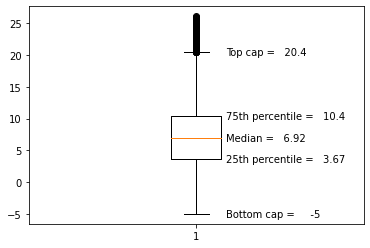

In [8]:
#03.02 plotting box with whiskers for one column
one_col = df_sample_colomn_energydata[df_sample_colomn_energydata.columns[4]].to_numpy()
fig, ax = plt.subplots()
# Create the boxplot and store the resulting python dictionary
boxplot=plt.boxplot(one_col)
# Call the function to make labels
make_labels(ax, boxplot)

╒═════════════╤══════════╤═════════╤═════════╤══════════════╤═══════════╕
│             │  Median  │  PC25   │  PC75   │  Cap Bottom  │  Cap Top  │
╞═════════════╪══════════╪═════════╪═════════╪══════════════╪═══════════╡
│ Appliances  │    20    │  18.79  │  21.5   │     16.1     │  25.5625  │
├─────────────┼──────────┼─────────┼─────────┼──────────────┼───────────┤
│ T2          │   40.5   │  37.9   │  43.26  │    29.89     │   51.29   │
├─────────────┼──────────┼─────────┼─────────┼──────────────┼───────────┤
│ RH_2        │  19.39   │ 18.2775 │ 20.6196 │    15.33     │  24.1267  │
├─────────────┼──────────┼─────────┼─────────┼──────────────┼───────────┤
│ T_out       │   7.3    │ 3.62667 │ 11.256  │    -6.065    │  22.6967  │
├─────────────┼──────────┼─────────┼─────────┼──────────────┼───────────┤
│ Press_mm_hg │   6.92   │  3.67   │  10.4   │      -5      │   20.4    │
╘═════════════╧══════════╧═════════╧═════════╧══════════════╧═══════════╛


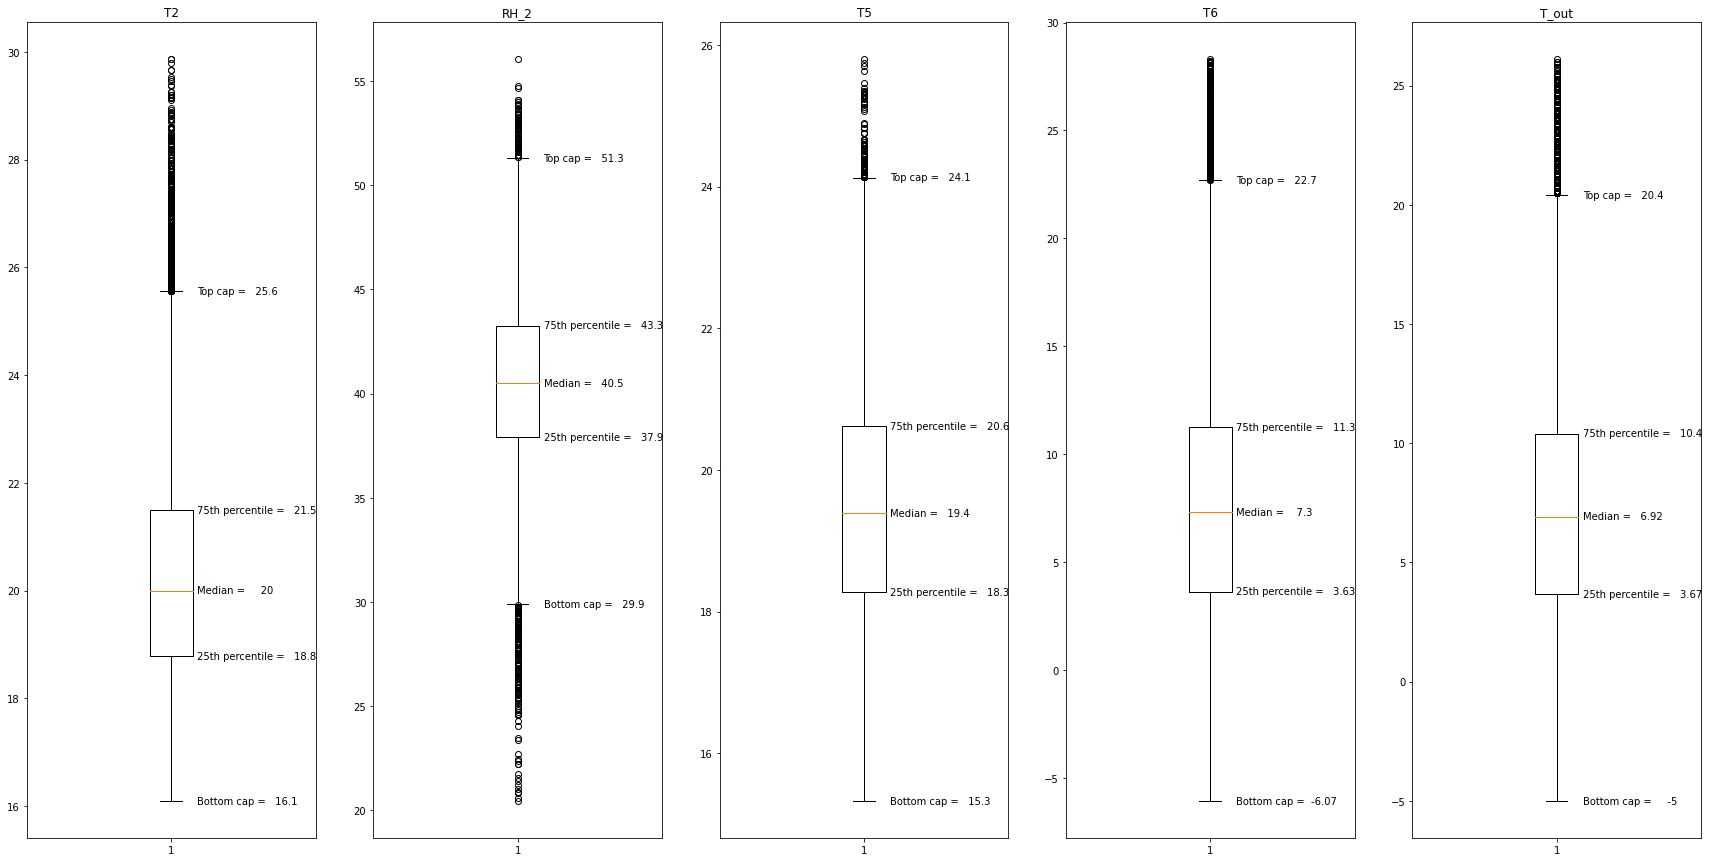

In [9]:
#03.03 plotting box with whiskers for all variables column and printing order statistics 
fig, axs = plt.subplots(len(df_sample_colomn_energydata.columns)//5,5, figsize=(30,15))
i=0
parameters=[]
for ax in axs.ravel():
    col=df_sample_colomn_energydata[df_sample_colomn_energydata.columns[i]].to_numpy()    
    bp=ax.boxplot(col)
    ax.set_title(df_sample_colomn_energydata.columns[i])
    if (i<4):
        i+=1
    parameters.append(make_labels(ax, bp))
#printing a table with order statistics.
rowIDs=['Appliances','T2','RH_2','T_out','Press_mm_hg']
print(tabulate(parameters, headers=['Median','PC25','PC75','Cap Bottom','Cap Top'],  tablefmt='fancy_grid',numalign ='center',showindex=rowIDs))


## Lab 01 Step 04 : Theoretical distributions that describe the sample on a basis of non-parametric analysis results

All positive.

Gamma T2 = Temperature /biased to left/ --> Gamma / Normal (Gaussian)

Normal RH_2 = Humidity /Centered/ --> Normal  (Gaussian)

Gamma T_out = Temperature /biased to left/ --> Gamma

Gamma Press_mm_hg = Pressure /biased to right/ -->  Normal (Gaussian)

T5

Gamma T6 = Temperature outside north. /biased to left/ --> Gamma

## Lab 01 Step 05 : Estimating parameters of chosen distributions using method of maximum likelihood and method of Least sequare error


### Lab 01 step 05 : all variables' distributions, both ways: MM and MLE. And p-value through kstest

T2  exponnorm  MM parameters:1.152314983065844,18.677234540612876,1.4445634293079603  Kstest:5.03461954030686e-10
T2  exponnorm  MLE parameters:1.6112740552068494,18.41004678475101,1.1989067301985354  Kstest:0.031538746117681704
RH_2  exponnorm  MM parameters:0.6336442524723236,38.316962542404596,3.3928660828449866  Kstest:1.5724261066124654e-09
RH_2  exponnorm  MLE parameters:3.743889527763804e-05,40.46324449936983,4.07045937112973  Kstest:5.273247749978277e-06
T5  exponnorm  MM parameters:0.8472383230120615,18.398796575980803,1.4243804509787221  Kstest:5.97434680502842e-14
T5  exponnorm  MLE parameters:1.181222817246662,18.14314991765116,1.238044912934975  Kstest:2.864194535516404e-09
T6  exponnorm  MM parameters:0.8647114697541235,3.9643337609389326,4.628726657860518  Kstest:0.00017879205008735277
T6  exponnorm  MLE parameters:1.0522559260930464,3.4708476237888597,4.272700803891152  Kstest:0.1323370388310081
T_out  exponnorm  MM parameters:0.8033249268356233,4.12330965071075,4.16794

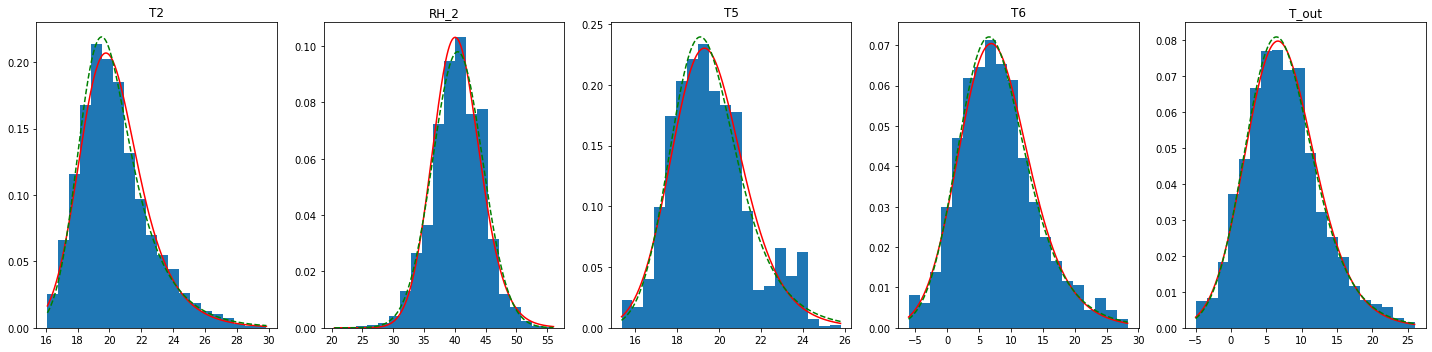

In [10]:
fig, axs = plt.subplots(len(df_sample_energydata.columns)// 5,5, figsize=(20, 5))
i=0
nbins=20
dists=['exponnorm','exponnorm','exponnorm','exponnorm','exponnorm']
index=0
for ax in axs.ravel():
    colomn_name=df_sample_energydata.columns[index]
    col = df_sample_energydata[colomn_name]
    #col=df_sample_energydata[df_sample_energydata.columns[0]].to_numpy()
    axis=np.linspace(col.min(), col.max(),500)
    x = getattr(stats, dists[index])
    MM = x.fit(col,method='MM')
    dist_MM = x.pdf(axis, *MM)
    MLE = x.fit(col,method='MLE')
    dist_MLE = x.pdf(axis, *MLE)

    #fig_T2, ax_T2 = plt.subplots()
    ax.hist(col, nbins,density=True, stacked=True)
    ax.plot(axis, dist_MM ,'-r', label='norm_MM')  #* len(col) * smax / nbins
    ax.plot(axis, dist_MLE,'--g', label='norm_MLE') #* len(col) * smax / nbins
    ax.set_title(colomn_name)

    #pValue_MM_T2=stats.ttest_ind(col, dist_MM_T2)
    #pValue_MLE_T2=stats.ttest_ind(col, dist_MLE_T2)
    #print(pValue_MM_T2)
    #print(pValue_MLE_T2)

    _,  kstest = stats.kstest(col, dists[index], MM, N=100)    
    _, kstest2 = stats.kstest(col, dists[index], MLE, N=100)
    print(colomn_name+'  '+dists[index] +'  MM parameters:'+ ','.join([str(i) for i in MM])+'  Kstest:'+str(kstest))
    print(colomn_name+'  '+dists[index] +'  MLE parameters:'+','.join([str(i) for i in MLE])+'  Kstest:'+str(kstest2))
    
    if (index!=4) :
        index+=1
plt.tight_layout()

### Lab 01 Step 05 each variable individually

(1.152314983065844, 18.677234540612876, 1.4445634293079603)
(1.6112740552068494, 18.41004678475101, 1.1989067301985354)
Ttest_indResult(statistic=205.62470030763578, pvalue=0.0)
Ttest_indResult(statistic=205.6221840675982, pvalue=0.0)
5.03461954030686e-10
0.031538746117681704


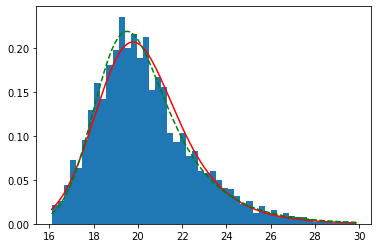

In [11]:
nbins_T2=50
col_T2=df_sample_energydata[df_sample_energydata.columns[0]].to_numpy()
max_T2=col_T2.max()
axis_T2=np.linspace(col_T2.min(), col_T2.max(),500)
x_T2 = stats.exponnorm  #.rvs(a, b, size=1000, random_state=123)
MM_T2 = x_T2.fit(col_T2,method='MM')
print(MM_T2)
dist_MM_T2 = x_T2.pdf(axis_T2, *MM_T2)
MLE_T2 = x_T2.fit(col_T2,method='MLE')
print(MLE_T2)
dist_MLE_T2 = x_T2.pdf(axis_T2, *MLE_T2)
fig_T2, ax_T2 = plt.subplots()
ax_T2.hist(col_T2, nbins_T2,density=True, stacked=True)
ax_T2.plot(axis_T2, dist_MM_T2 ,'-r', label='norm_MM')  #* len(col) * smax / nbins
ax_T2.plot(axis_T2, dist_MLE_T2,'--g', label='norm_MLE') #* len(col) * smax / nbins

pValue_MM_T2=stats.ttest_ind(col_T2, dist_MM_T2)
pValue_MLE_T2=stats.ttest_ind(col_T2, dist_MLE_T2)
print(pValue_MM_T2)
print(pValue_MLE_T2)

_, kstest = stats.kstest(col_T2, 'exponnorm', MM_T2, N=100)
_, kstest2 = stats.kstest(col_T2, 'exponnorm', MLE_T2, N=100)
print(kstest)
print(kstest2)

### Above I tried already all available distributions and none has a pvalue >0.05. That is why moving to detecting the outliers and replace them with mean value.

### Data triming outliers

In [12]:
#detecting outliers and eliminate them (their value becomes NAN)
Q1=df_sample_colomn_energydata.quantile(0.25)
Q3 = df_sample_colomn_energydata.quantile(0.75)
IQR = Q3-Q1

print (IQR)

dataClean = df_sample_colomn_energydata[~((df_sample_colomn_energydata < (Q1-IQR * 1.5)) |(df_sample_colomn_energydata > (Q3 + IQR*1.5)))]
dataClean.head()
dataClean.shape
dataClean

T2       2.710000
RH_2     5.360000
T5       2.342143
T6       7.629333
T_out    6.730000
dtype: float64


,T2,RH_2,T5,T6,T_out
0,19.200000,44.790000,17.166667,7.026667,6.60
1,19.200000,44.722500,17.166667,6.833333,6.48
2,19.200000,44.626667,17.166667,6.560000,6.37
3,19.200000,44.590000,17.166667,6.433333,6.25
4,19.200000,44.530000,17.200000,6.366667,6.13
...,...,...,...,...,...
19730,NaN,42.025714,23.200000,NaN,NaN
19731,NaN,42.080000,23.230000,NaN,NaN
19732,NaN,42.768571,23.230000,NaN,NaN
19733,25.414000,43.036000,23.200000,22.433333,NaN


In [13]:
#Replacing NAN values with mean value.
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
dataImp = pd.DataFrame(imputer.fit_transform(dataClean), columns=dataClean.columns)
dataImp.head()

dataImp

,T2,RH_2,T5,T6,T_out
0,19.200000,44.790000,17.166667,7.026667,6.600000
1,19.200000,44.722500,17.166667,6.833333,6.480000
2,19.200000,44.626667,17.166667,6.560000,6.370000
3,19.200000,44.590000,17.166667,6.433333,6.250000
4,19.200000,44.530000,17.200000,6.366667,6.130000
...,...,...,...,...,...
19730,20.157433,42.025714,23.200000,7.456671,7.068772
19731,20.157433,42.080000,23.230000,7.456671,7.068772
19732,20.157433,42.768571,23.230000,7.456671,7.068772
19733,25.414000,43.036000,23.200000,22.433333,7.068772


T2  gamma  MM parameters:15.911308764886899,12.59170049772609,0.47549403027298254  Kstest:7.155193808769019e-19
T2  gamma  MLE parameters:10.630658020779236,13.943652217379372,0.5845153140196346  Kstest:1.1653388857481722e-11
RH_2  exponnorm  MM parameters:0.6731763037454981,38.38810876104573,3.128006297733313  Kstest:3.728587231637326e-18
RH_2  exponnorm  MLE parameters:0.000629592388083564,40.48908239879875,3.808450267991142  Kstest:1.2035092244591037e-05
T5  exponnorm  MM parameters:0.8315444795488822,18.407191272812796,1.3712546051721368  Kstest:9.295325790290272e-23
T5  exponnorm  MLE parameters:1.0798768759359172,18.211579092964897,1.237024694945245  Kstest:8.612318950986811e-15
T6  exponnorm  MM parameters:0.6118286496294203,4.629883443737608,4.620223934325219  Kstest:3.6644892348300955e-09
T6  exponnorm  MLE parameters:0.6632647697601387,4.44576013232459,4.53951804057872  Kstest:3.6871970569908437e-07
T_out  exponnorm  MM parameters:0.5610061855162076,4.7191935465600885,4.18814

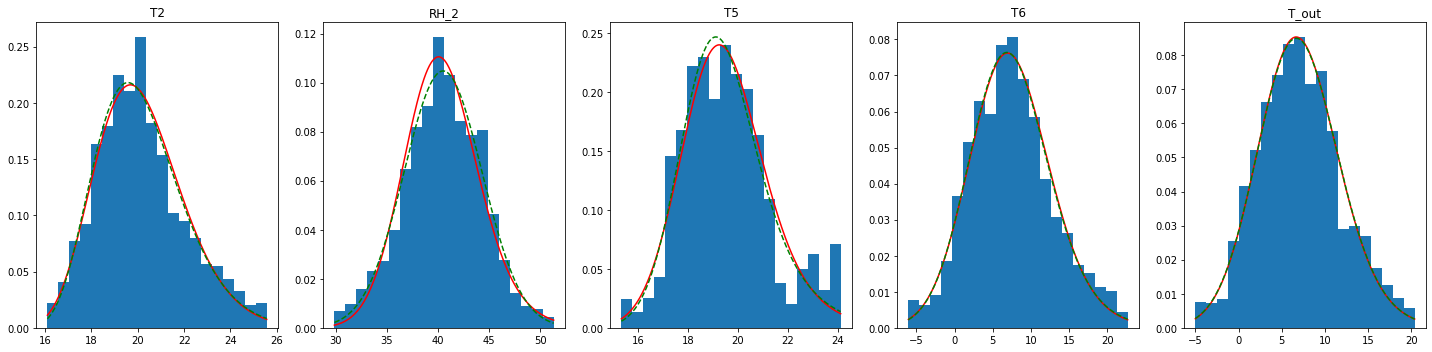

In [14]:
# trying the distributions after trimming the outliers
fig, axs = plt.subplots(len(dataImp.columns)// 5,5, figsize=(20, 5))
i=0
nbins=20
dists=['gamma','exponnorm','exponnorm','exponnorm','exponnorm']
index=0
for ax in axs.ravel():
    colomn_name=dataImp.columns[index]
    col = dataImp[colomn_name]
    #col=df_sample_energydata[df_sample_energydata.columns[0]].to_numpy()
    axis=np.linspace(col.min(), col.max(),500)
    x = getattr(stats, dists[index])
    MM = x.fit(col,method='MM')
    dist_MM = x.pdf(axis, *MM)
    MLE = x.fit(col,method='MLE')
    dist_MLE = x.pdf(axis, *MLE)

    #fig_T2, ax_T2 = plt.subplots()
    ax.hist(col, nbins,density=True, stacked=True)
    ax.plot(axis, dist_MM ,'-r', label='norm_MM')  #* len(col) * smax / nbins
    ax.plot(axis, dist_MLE,'--g', label='norm_MLE') #* len(col) * smax / nbins
    ax.set_title(colomn_name)

    #pValue_MM_T2=stats.ttest_ind(col, dist_MM_T2)
    #pValue_MLE_T2=stats.ttest_ind(col, dist_MLE_T2)
    #print(pValue_MM_T2)
    #print(pValue_MLE_T2)

    _,  kstest = stats.kstest(col, dists[index], MM, N=100)    
    _, kstest2 = stats.kstest(col, dists[index], MLE, N=100)
    print(colomn_name+'  '+dists[index] +'  MM parameters:'+ ','.join([str(i) for i in MM])+'  Kstest:'+str(kstest))
    print(colomn_name+'  '+dists[index] +'  MLE parameters:'+','.join([str(i) for i in MLE])+'  Kstest:'+str(kstest2))
    
    if (index!=4) :
        index+=1
plt.tight_layout()

╒═════════════╤══════════╤═════════╤════════╤══════════════╤═══════════╕
│             │  Median  │  PC25   │  PC75  │  Cap Bottom  │  Cap Top  │
╞═════════════╪══════════╪═════════╪════════╪══════════════╪═══════════╡
│ Appliances  │    20    │  18.79  │ 21.26  │     16.1     │  24.9633  │
├─────────────┼──────────┼─────────┼────────┼──────────────┼───────────┤
│ T2          │ 40.4915  │   38    │  43.2  │     30.2     │    51     │
├─────────────┼──────────┼─────────┼────────┼──────────────┼───────────┤
│ RH_2        │  19.39   │ 18.2775 │  20.6  │    15.33     │   24.08   │
├─────────────┼──────────┼─────────┼────────┼──────────────┼───────────┤
│ T_out       │   7.3    │ 3.62667 │ 10.69  │    -6.065    │  21.2633  │
├─────────────┼──────────┼─────────┼────────┼──────────────┼───────────┤
│ Press_mm_hg │   6.92   │  3.67   │  10.1  │      -5      │   19.7    │
╘═════════════╧══════════╧═════════╧════════╧══════════════╧═══════════╛


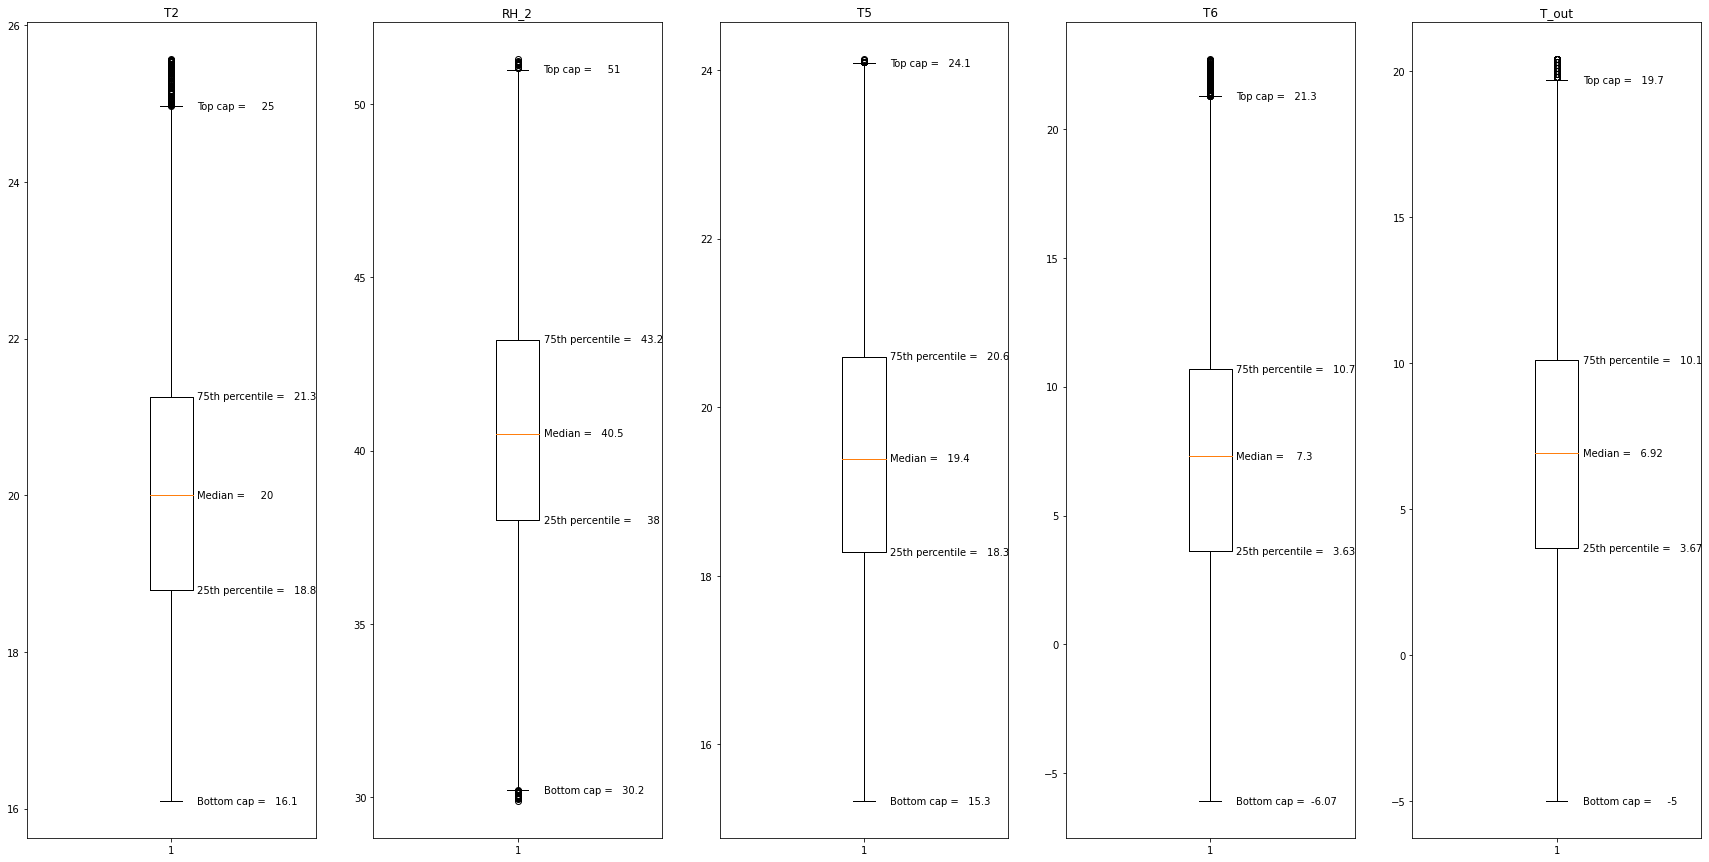

In [15]:
# checking the box with whiskers plots after trimming the data
# plotting box with whiskers for all variables column and printing order statistics 
fig, axs = plt.subplots(len(dataImp.columns)//5,5, figsize=(30,15))
i=0
parameters=[]
for ax in axs.ravel():
    col=dataImp[dataImp.columns[i]].to_numpy()    
    bp=ax.boxplot(col)
    ax.set_title(dataImp.columns[i])
    if (i<4):
        i+=1
    parameters.append(make_labels(ax, bp))
#printing a table with order statistics.
rowIDs=['Appliances','T2','RH_2','T_out','Press_mm_hg']
print(tabulate(parameters, headers=['Median','PC25','PC75','Cap Bottom','Cap Top'],  tablefmt='fancy_grid',numalign ='center',showindex=rowIDs))

#### finding distributions

Trying to find suitable distribution after replacing the outliers with the mean value. Non of the distributions get pvalue >0.05

In [ ]:
dist_name = ['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford',\
        'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma',\
        'dweibull', 'erlang', 'expon', 'exponnorm', 'exponweib', 'exponpow', 'f',\
        'fatiguelife', 'foldcauchy', 'foldnorm', 'genlogistic', 'gennorm', 'genpareto',\
        'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 'genhalflogistic',\
        'genhyperbolic', 'geninvgauss', 'gilbrat', 'gompertz', 'gumbel_r', 'gumbel_l',\
        'halfcauchy', 'halflogistic', 'halfnorm', 'halfgennorm', 'hypsecant', 'invgamma',\
        'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa4', 'kappa3', 'ksone',\
        'kstwobign', 'laplace', 'laplace_asymmetric', 'levy', 'levy_l',\
        'logistic', 'loggamma', 'loglaplace', 'lognorm', 'loguniform',\
        'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncx2', 'ncf', 'nct', 'norm',\
        'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm',\
        'rdist', 'rayleigh', 'rice', 'recipinvgauss', 'semicircular', 'skewcauchy',\
        'skewnorm', 't', 'trapezoid', 'triang', 'truncexpon',\
        'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'vonmises_line', 'wald',\
        'weibull_min', 'weibull_max', 'wrapcauchy']

df_dist = []
for d in dist_name:
    print(d)
    dct = {
            'distribution': d
    }
    for c in dataImp.columns[0:]:
        try:
            dist = getattr(stats, d)
            feature = dataImp[c]
            param = dist.fit(feature)
            _, kstest = stats.kstest(feature, d, param, N=100)
            _, chisq = stats.chisquare(feature)
                    
            dct['{}_params'.format(c)] = param
            dct['{}_kstest'.format(c)] = kstest
            dct['{}_chi2'.format(c)] = chisq
        except:
            continue
    
    df_dist.append(dct)
    
df_dist = pd.DataFrame(df_dist)

In [125]:

top_T2 = df_dist[df_dist['T2_kstest'] >= 0.05].sort_values(by=['T2_kstest'], ascending=False).reset_index()

top_RH_2 = df_dist[df_dist['RH_2_kstest'] >= 0.05].sort_values(by=['RH_2_kstest'], ascending=False).reset_index()

top_T_out = df_dist[df_dist['T_out_kstest'] >= 0.05].sort_values(by=['T_out_kstest'], ascending=False).reset_index()

top_T5 = df_dist[df_dist['T5_kstest'] >= 0.05].sort_values(by=['T5_kstest'], ascending=False).reset_index()

top_T6 = df_dist[df_dist['T6_kstest'] >= 0.05].sort_values(by=['T6_kstest'], ascending=False).reset_index()

In [126]:

print(top_T2)
print(top_RH_2)
print(top_T_out)
print(top_T5)
print(top_T6)


Empty DataFrame
Columns: [index, distribution, T2_params, T2_kstest, T2_chi2, RH_2_params, RH_2_kstest, RH_2_chi2, T5_params, T5_kstest, T5_chi2, T6_params, T6_kstest, T6_chi2, T_out_params, T_out_kstest, T_out_chi2]
Index: []
Empty DataFrame
Columns: [index, distribution, T2_params, T2_kstest, T2_chi2, RH_2_params, RH_2_kstest, RH_2_chi2, T5_params, T5_kstest, T5_chi2, T6_params, T6_kstest, T6_chi2, T_out_params, T_out_kstest, T_out_chi2]
Index: []
Empty DataFrame
Columns: [index, distribution, T2_params, T2_kstest, T2_chi2, RH_2_params, RH_2_kstest, RH_2_chi2, T5_params, T5_kstest, T5_chi2, T6_params, T6_kstest, T6_chi2, T_out_params, T_out_kstest, T_out_chi2]
Index: []
Empty DataFrame
Columns: [index, distribution, T2_params, T2_kstest, T2_chi2, RH_2_params, RH_2_kstest, RH_2_chi2, T5_params, T5_kstest, T5_chi2, T6_params, T6_kstest, T6_chi2, T_out_params, T_out_kstest, T_out_chi2]
Index: []
Empty DataFrame
Columns: [index, distribution, T2_params, T2_kstest, T2_chi2, RH_2_params, R

In [62]:
print(top_T6)

   index distribution                                          T2_params  \
0     18    exponnorm  (1.6948325573732554, 18.379929555194458, 1.164...   
1     25  genlogistic  (35.14382935695595, 13.1687490074535, 1.743617...   

   T2_kstest  T2_chi2                                        RH_2_params  \
0   0.017749      1.0  (0.0005392619555001387, 40.41497148261008, 4.1...   
1   0.000736      1.0  (0.7846199048563327, 41.32881726579947, 2.1085...   

   RH_2_kstest  RH_2_chi2                                       T_out_params  \
0     0.000038        1.0  (1.0006544684798833, 3.656963252380575, 3.7986...   
1     0.000004        1.0  (2.960493374416993, 1.8384539569868243, 3.7994...   

   T_out_kstest  T_out_chi2  \
0      0.017313         0.0   
1      0.003403         0.0   

                                         RH_6_params   RH_6_kstest  RH_6_chi2  \
0  (0.0005818283568664398, 54.66934889387795, 31....  3.420836e-61        0.0   
1  (1.9843984123776683e-07, 99.90010971027573

In [56]:
print(df_dist)

     distribution                                          T2_params  \
0           alpha  (6.6102727763664735, 6.783939493476769, 87.474...   
1          anglit            (21.97116819534623, 10.041838135710975)   
2         arcsine           (16.099999999999998, 13.768808529180607)   
3           argus  (2.2231386160226176e-05, 12.14920400643582, 17...   
4            beta  (5.672490736751861, 10640.703989524485, 15.162...   
..            ...                                                ...   
93  vonmises_line  (2.693723864006069, 20.188252876151765, 3.0775...   
94           wald            (15.901056114971414, 5.669784190222369)   
95    weibull_min  (0.7395140240895671, 16.099999999999998, 1.478...   
96    weibull_max  (32.63385230870607, 77.32073034810534, 57.9553...   
97     wrapcauchy  (0.002657655814212689, 16.099999997063904, 2.1...   

       T2_kstest  T2_chi2                                        RH_2_params  \
0   1.160939e-05      1.0  (27.081164943046616, -71.853

### Above I tried already all available distributions for trimmed and non trimmed data and none has a pvalue >0.05. That is why moving to normalizing.

### Normalizing

In [128]:
## Data Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataTrans = pd.DataFrame(scaler.fit_transform(df_sample_colomn_energydata), columns=df_sample_colomn_energydata.columns)
dataTrans.head()

#eliminating outliers
Q1_Trans=dataTrans.quantile(0.25)
Q3_Trans = dataTrans.quantile(0.75)
IQR_Trans = Q3_Trans-Q1_Trans

dataClean_Trans = dataTrans[~((dataTrans < (Q1_Trans-IQR_Trans * 1.5)) |(dataTrans > (Q3_Trans + IQR_Trans*1.5)))]
dataClean_Trans.head()
dataClean_Trans.shape

#filling NAN with mean
imputer = SimpleImputer(strategy='mean')
dataImp_Trans = pd.DataFrame(imputer.fit_transform(dataClean_Trans), columns=dataClean_Trans.columns)
dataImp_Trans.head()

,T2,RH_2,T5,T6,T_out
0,0.225345,0.684038,0.175506,0.381070,0.372990
1,0.225345,0.682140,0.175506,0.375443,0.369132
2,0.225345,0.679445,0.175506,0.367487,0.365595
3,0.225345,0.678414,0.175506,0.363800,0.361736
4,0.225345,0.676727,0.178691,0.361859,0.357878


T2  norm  MM parameters:0.2949430211977356,0.13787477169394197  Kstest:1.2501640697817105e-74
T2  norm  MLE parameters:0.2949430211977356,0.13787477169394197  Kstest:1.2501640697817105e-74
RH_2  norm  MM parameters:0.5631685481856682,0.10708927001058872  Kstest:1.2041232009241543e-05
RH_2  norm  MLE parameters:0.5631685481856682,0.10708927001058872  Kstest:1.2041232009241543e-05
T5  norm  MM parameters:0.40300267776223175,0.17047952538953395  Kstest:5.234154394521535e-37
T5  norm  MLE parameters:0.40300267776223175,0.17047952538953395  Kstest:5.234154394521535e-37
T6  norm  MM parameters:0.39358669375496047,0.157658939737616  Kstest:2.2157674121238125e-25
T6  norm  MLE parameters:0.39358669375496047,0.157658939737616  Kstest:2.2157674121238125e-25
T_out  norm  MM parameters:0.3880634107931598,0.15441160416664507  Kstest:6.256053165735105e-21
T_out  norm  MLE parameters:0.3880634107931598,0.15441160416664507  Kstest:6.256053165735105e-21


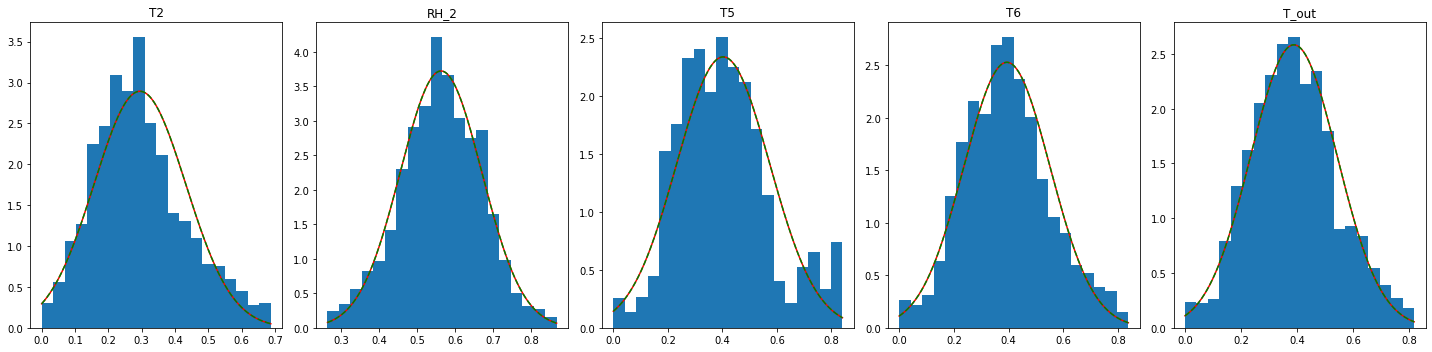

In [130]:
# trying the distributions after normalizing and trimming the outliers
fig, axs = plt.subplots(len(dataImp_Trans.columns)// 5,5, figsize=(20, 5))
i=0
nbins=20
dists=['norm','norm','norm','norm','norm']
index=0
for ax in axs.ravel():
    colomn_name=dataImp_Trans.columns[index]
    col = dataImp_Trans[colomn_name]
    #col=df_sample_energydata[df_sample_energydata.columns[0]].to_numpy()
    axis=np.linspace(col.min(), col.max(),500)
    x = getattr(stats, dists[index])
    MM = x.fit(col,method='MM')
    dist_MM = x.pdf(axis, *MM)
    MLE = x.fit(col,method='MLE')
    dist_MLE = x.pdf(axis, *MLE)

    #fig_T2, ax_T2 = plt.subplots()
    ax.hist(col, nbins,density=True, stacked=True)
    ax.plot(axis, dist_MM ,'-r', label='norm_MM')  #* len(col) * smax / nbins
    ax.plot(axis, dist_MLE,'--g', label='norm_MLE') #* len(col) * smax / nbins
    ax.set_title(colomn_name)

    #pValue_MM_T2=stats.ttest_ind(col, dist_MM_T2)
    #pValue_MLE_T2=stats.ttest_ind(col, dist_MLE_T2)
    #print(pValue_MM_T2)
    #print(pValue_MLE_T2)

    _,  kstest = stats.kstest(col, dists[index], MM, N=100)    
    _, kstest2 = stats.kstest(col, dists[index], MLE, N=100)
    print(colomn_name+'  '+dists[index] +'  MM parameters:'+ ','.join([str(i) for i in MM])+'  Kstest:'+str(kstest))
    print(colomn_name+'  '+dists[index] +'  MLE parameters:'+','.join([str(i) for i in MLE])+'  Kstest:'+str(kstest2))
    
    if (index!=4) :
        index+=1
plt.tight_layout()

In [ ]:
dist_name = ['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford',\
        'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma',\
        'dweibull', 'erlang', 'expon', 'exponnorm', 'exponweib', 'exponpow', 'f',\
        'fatiguelife', 'foldcauchy', 'foldnorm', 'genlogistic', 'gennorm', 'genpareto',\
        'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 'genhalflogistic',\
        'genhyperbolic', 'geninvgauss', 'gilbrat', 'gompertz', 'gumbel_r', 'gumbel_l',\
        'halfcauchy', 'halflogistic', 'halfnorm', 'halfgennorm', 'hypsecant', 'invgamma',\
        'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa4', 'kappa3', 'ksone',\
        'kstwobign', 'laplace', 'laplace_asymmetric', 'levy', 'levy_l',\
        'logistic', 'loggamma', 'loglaplace', 'lognorm', 'loguniform',\
        'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncx2', 'ncf', 'nct', 'norm',\
        'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm',\
        'rdist', 'rayleigh', 'rice', 'recipinvgauss', 'semicircular', 'skewcauchy',\
        'skewnorm', 't', 'trapezoid', 'triang', 'truncexpon',\
        'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'vonmises_line', 'wald',\
        'weibull_min', 'weibull_max', 'wrapcauchy']

df_dist = []
for d in dist_name:
    print(d)
    dct = {
            'distribution': d
    }
    for c in dataImp_Trans.columns[0:]:
        try:
            dist = getattr(stats, d)
            # # boxcox
            #feature = stats.boxcox(df_sample_energydata[c])
            #param = dist.fit(feature[0])
            #_, kstest = stats.kstest(feature[0], d, param, N=100)
            #_, chisq = stats.chisquare(feature[0])

            # original
            feature = dataImp_Trans[c]
            param = dist.fit(feature)
            _, kstest = stats.kstest(feature, d, param, N=100)
            _, chisq = stats.chisquare(feature)
                    
            dct['{}_params'.format(c)] = param
            dct['{}_kstest'.format(c)] = kstest
            dct['{}_chi2'.format(c)] = chisq
        except:
            continue
    
    df_dist.append(dct)
    
df_dist = pd.DataFrame(df_dist)

In [140]:
top_T2 = df_dist[df_dist['T2_kstest'] >= 0.01].sort_values(by=['T2_kstest'], ascending=False).reset_index()

top_RH_2 = df_dist[df_dist['RH_2_kstest'] >= 0.01].sort_values(by=['RH_2_kstest'], ascending=False).reset_index()

top_T_out = df_dist[df_dist['T_out_kstest'] >= 0.01].sort_values(by=['T_out_kstest'], ascending=False).reset_index()

top_T5 = df_dist[df_dist['T5_kstest'] >= 0.01].sort_values(by=['T5_kstest'], ascending=False).reset_index()

top_T6 = df_dist[df_dist['T6_kstest'] >= 0.01].sort_values(by=['T6_kstest'], ascending=False).reset_index()


print(top_T2)
print(top_RH_2)
print(top_T_out)
print(top_T5)
print(top_T6)

Empty DataFrame
Columns: [index, distribution, T2_params, T2_kstest, T2_chi2, RH_2_params, RH_2_kstest, RH_2_chi2, T5_params, T5_kstest, T5_chi2, T6_params, T6_kstest, T6_chi2, T_out_params, T_out_kstest, T_out_chi2]
Index: []
Empty DataFrame
Columns: [index, distribution, T2_params, T2_kstest, T2_chi2, RH_2_params, RH_2_kstest, RH_2_chi2, T5_params, T5_kstest, T5_chi2, T6_params, T6_kstest, T6_chi2, T_out_params, T_out_kstest, T_out_chi2]
Index: []
Empty DataFrame
Columns: [index, distribution, T2_params, T2_kstest, T2_chi2, RH_2_params, RH_2_kstest, RH_2_chi2, T5_params, T5_kstest, T5_chi2, T6_params, T6_kstest, T6_chi2, T_out_params, T_out_kstest, T_out_chi2]
Index: []
Empty DataFrame
Columns: [index, distribution, T2_params, T2_kstest, T2_chi2, RH_2_params, RH_2_kstest, RH_2_chi2, T5_params, T5_kstest, T5_chi2, T6_params, T6_kstest, T6_chi2, T_out_params, T_out_kstest, T_out_chi2]
Index: []
Empty DataFrame
Columns: [index, distribution, T2_params, T2_kstest, T2_chi2, RH_2_params, R

In [141]:
df_dist

,distribution,T2_params,T2_kstest,T2_chi2,RH_2_params,RH_2_kstest,RH_2_chi2,T5_params,T5_kstest,T5_chi2,T6_params,T6_kstest,T6_chi2,T_out_params,T_out_kstest,T_out_chi2
0,alpha,"(10.048658546647111, -1.0560618560017732, 13.4...",1.483515e-11,1.0,"(27.038619055797135, -2.397264189188006, 79.92...",1.145169e-20,1.0,"(11.328832116404808, -1.4850802237864582, 21.2...",3.358073e-16,1.0,"(19.55536896574339, -2.66702205140533, 59.6940...",9.224507e-06,1.0,"(21.507352518685423, -2.9158029363153357, 70.8...",1.628619e-04,1.0
1,anglit,"(0.33123243126101637, 0.4551397440665754)",0.000000e+00,1.0,"(0.5658318416119115, 0.3833338508344498)",3.599500e-141,1.0,"(0.4241094551168928, 0.55579575177171)",4.477393e-285,1.0,"(0.4160938136013984, 0.5369777927121897)",4.380346e-242,1.0,"(0.4068758296054724, 0.5235755407908214)",4.428469e-217,1.0
2,arcsine,"(-3.865898768260472e-27, 0.6906713328607634)",0.000000e+00,1.0,"(0.2650667701595914, 0.6017436149998782)",0.000000e+00,1.0,"(-0.09139058298791464, 0.9319702934513644)",0.000000e+00,1.0,"(-0.006803421479502492, 0.8439935443146067)",0.000000e+00,1.0,"(-0.006637073187678531, 0.8233573304224052)",0.000000e+00,1.0
3,argus,"(0.00010848153370906144, -0.09304100903148524,...",0.000000e+00,1.0,"(2.6300790239163646e-05, 0.20632476595270227, ...",0.000000e+00,1.0,"(7.16575908533384e-05, -0.05909679007718921, 0...",0.000000e+00,1.0,"(0.0003890644867587244, -0.06113631514894529, ...",0.000000e+00,1.0,"(8.023436204182723e-05, -0.05500557954636473, ...",0.000000e+00,1.0
4,beta,"(4.226456968605834, 10.913505798541445, -0.048...",4.188803e-20,1.0,"(30.157988627096394, 20.92771995292862, -0.364...",7.505496e-04,1.0,"(15.263966784482584, 719.5612121845695, -0.269...",2.039890e-18,1.0,"(13.110677631187965, 33.13185970997148, -0.287...",5.809410e-08,1.0,"(7.859589015244886, 13.082777657571999, -0.172...",7.018388e-08,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,vonmises_line,"(1.3053444091671746, 3.7089370400595265, 1.415...",0.000000e+00,1.0,"(1.3053444359008441, 4.039271992260824, 1.8897...",0.000000e+00,1.0,"(1.3053444311520206, 3.69050284661209, 4.32736...",0.000000e+00,1.0,"(1.3053444287069533, 3.690911890213104, 6.5755...",0.000000e+00,1.0,"(1.3053444292168583, 3.693382660057983, 2.5348...",0.000000e+00,1.0
94,wald,"(-0.013610280640437624, 0.4009310569642234)",0.000000e+00,1.0,"(0.25491005898264985, 0.4204518522676719)",0.000000e+00,1.0,"(-0.024296778142413992, 0.5757953253862191)",0.000000e+00,1.0,"(-0.016037814250416747, 0.5513038206245118)",0.000000e+00,1.0,"(-0.015515044770246355, 0.5448573370034842)",0.000000e+00,1.0
95,weibull_min,"(2.368531963184821, -0.012977810513001623, 0.3...",4.176955e-27,1.0,"(4.014687871981651, 0.17946249482330437, 0.423...",7.762349e-06,1.0,"(2.7058181174272455, -0.030827427224092985, 0....",2.529119e-37,1.0,"(2.967404303630639, -0.04034864562613149, 0.48...",1.579404e-17,1.0,"(3.0129529330077656, -0.0413637660019341, 0.48...",3.171797e-11,1.0
96,weibull_max,"(7.774076849328314, 1.1915659945936494, 0.9539...",7.394737e-13,1.0,"(3.464177217264896, 0.9020224836741648, 0.3764...",1.174223e-09,1.0,"(6.935652874154918, 1.4008073529087688, 1.0673...",8.523753e-19,1.0,"(4.9056716584416735, 1.06699487521113, 0.73427...",2.744710e-08,1.0,"(4.616346031149352, 1.0116349706944257, 0.6824...",1.236739e-06,1.0


In [ ]:
## Data Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataTrans = pd.DataFrame(scaler.fit_transform(df_sample_colomn_energydata), columns=df_sample_colomn_energydata.columns)
dataTrans.head()

#eliminating outliers
Q1_Trans=dataTrans.quantile(0.25)
Q3_Trans = dataTrans.quantile(0.75)
IQR_Trans = Q3_Trans-Q1_Trans

dataClean_Trans = dataTrans[~((dataTrans < (Q1_Trans-IQR_Trans * 1.5)) |(dataTrans > (Q3_Trans + IQR_Trans*1.5)))]
dataClean_Trans.head()
dataClean_Trans.shape

#filling NAN with mean
imputer = SimpleImputer(strategy='mean')
dataImp_Trans = pd.DataFrame(imputer.fit_transform(dataClean_Trans), columns=dataClean_Trans.columns)
dataImp_Trans.head()

,T2,RH_2,T5,T6,T_out
0,0.225345,0.684038,0.175506,0.381070,0.372990
1,0.225345,0.682140,0.175506,0.375443,0.369132
2,0.225345,0.679445,0.175506,0.367487,0.365595
3,0.225345,0.678414,0.175506,0.363800,0.361736
4,0.225345,0.676727,0.178691,0.361859,0.357878


T2  norm  MM parameters:0.2949430211977356,0.13787477169394197  Kstest:1.2501640697817105e-74
T2  norm  MLE parameters:0.2949430211977356,0.13787477169394197  Kstest:1.2501640697817105e-74
RH_2  norm  MM parameters:0.5631685481856682,0.10708927001058872  Kstest:1.2041232009241543e-05
RH_2  norm  MLE parameters:0.5631685481856682,0.10708927001058872  Kstest:1.2041232009241543e-05
T5  norm  MM parameters:0.40300267776223175,0.17047952538953395  Kstest:5.234154394521535e-37
T5  norm  MLE parameters:0.40300267776223175,0.17047952538953395  Kstest:5.234154394521535e-37
T6  norm  MM parameters:0.39358669375496047,0.157658939737616  Kstest:2.2157674121238125e-25
T6  norm  MLE parameters:0.39358669375496047,0.157658939737616  Kstest:2.2157674121238125e-25
T_out  norm  MM parameters:0.3880634107931598,0.15441160416664507  Kstest:6.256053165735105e-21
T_out  norm  MLE parameters:0.3880634107931598,0.15441160416664507  Kstest:6.256053165735105e-21


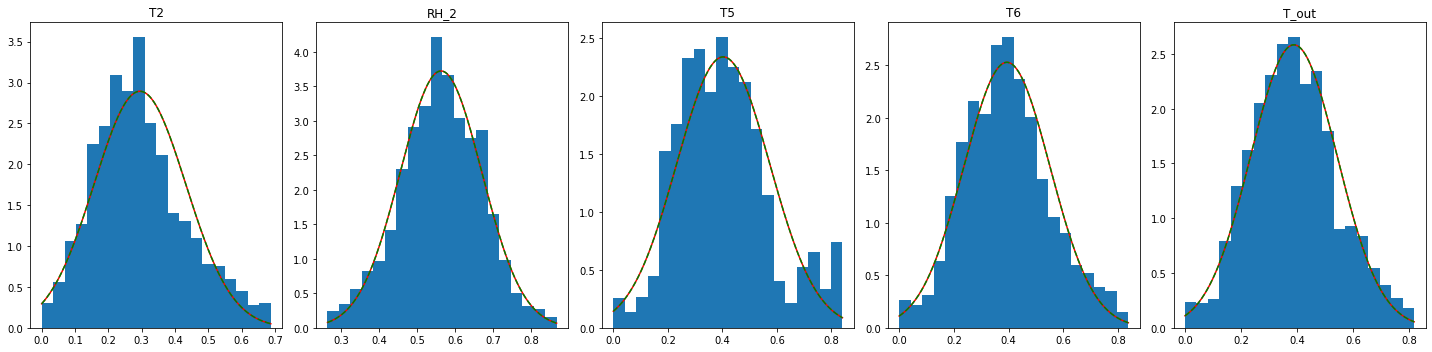

In [ ]:
# trying the distributions after normalizing and trimming the outliers
fig, axs = plt.subplots(len(dataImp_Trans.columns)// 5,5, figsize=(20, 5))
i=0
nbins=20
dists=['norm','norm','norm','norm','norm']
index=0
for ax in axs.ravel():
    colomn_name=dataImp_Trans.columns[index]
    col = dataImp_Trans[colomn_name]
    #col=df_sample_energydata[df_sample_energydata.columns[0]].to_numpy()
    axis=np.linspace(col.min(), col.max(),500)
    x = getattr(stats, dists[index])
    MM = x.fit(col,method='MM')
    dist_MM = x.pdf(axis, *MM)
    MLE = x.fit(col,method='MLE')
    dist_MLE = x.pdf(axis, *MLE)

    #fig_T2, ax_T2 = plt.subplots()
    ax.hist(col, nbins,density=True, stacked=True)
    ax.plot(axis, dist_MM ,'-r', label='norm_MM')  #* len(col) * smax / nbins
    ax.plot(axis, dist_MLE,'--g', label='norm_MLE') #* len(col) * smax / nbins
    ax.set_title(colomn_name)

    #pValue_MM_T2=stats.ttest_ind(col, dist_MM_T2)
    #pValue_MLE_T2=stats.ttest_ind(col, dist_MLE_T2)
    #print(pValue_MM_T2)
    #print(pValue_MLE_T2)

    _,  kstest = stats.kstest(col, dists[index], MM, N=100)    
    _, kstest2 = stats.kstest(col, dists[index], MLE, N=100)
    print(colomn_name+'  '+dists[index] +'  MM parameters:'+ ','.join([str(i) for i in MM])+'  Kstest:'+str(kstest))
    print(colomn_name+'  '+dists[index] +'  MLE parameters:'+','.join([str(i) for i in MLE])+'  Kstest:'+str(kstest2))
    
    if (index!=4) :
        index+=1
plt.tight_layout()

In [ ]:
dist_name = ['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford',\
        'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma',\
        'dweibull', 'erlang', 'expon', 'exponnorm', 'exponweib', 'exponpow', 'f',\
        'fatiguelife', 'foldcauchy', 'foldnorm', 'genlogistic', 'gennorm', 'genpareto',\
        'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 'genhalflogistic',\
        'genhyperbolic', 'geninvgauss', 'gilbrat', 'gompertz', 'gumbel_r', 'gumbel_l',\
        'halfcauchy', 'halflogistic', 'halfnorm', 'halfgennorm', 'hypsecant', 'invgamma',\
        'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa4', 'kappa3', 'ksone',\
        'kstwobign', 'laplace', 'laplace_asymmetric', 'levy', 'levy_l',\
        'logistic', 'loggamma', 'loglaplace', 'lognorm', 'loguniform',\
        'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncx2', 'ncf', 'nct', 'norm',\
        'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm',\
        'rdist', 'rayleigh', 'rice', 'recipinvgauss', 'semicircular', 'skewcauchy',\
        'skewnorm', 't', 'trapezoid', 'triang', 'truncexpon',\
        'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'vonmises_line', 'wald',\
        'weibull_min', 'weibull_max', 'wrapcauchy']

df_dist = []
for d in dist_name:
    print(d)
    dct = {
            'distribution': d
    }
    for c in dataImp_Trans.columns[0:]:
        try:
            dist = getattr(stats, d)
            # # boxcox
            #feature = stats.boxcox(df_sample_energydata[c])
            #param = dist.fit(feature[0])
            #_, kstest = stats.kstest(feature[0], d, param, N=100)
            #_, chisq = stats.chisquare(feature[0])

            # original
            feature = dataImp_Trans[c]
            param = dist.fit(feature)
            _, kstest = stats.kstest(feature, d, param, N=100)
            _, chisq = stats.chisquare(feature)
                    
            dct['{}_params'.format(c)] = param
            dct['{}_kstest'.format(c)] = kstest
            dct['{}_chi2'.format(c)] = chisq
        except:
            continue
    
    df_dist.append(dct)
    
df_dist = pd.DataFrame(df_dist)

In [ ]:
top_T2 = df_dist[df_dist['T2_kstest'] >= 0.01].sort_values(by=['T2_kstest'], ascending=False).reset_index()

top_RH_2 = df_dist[df_dist['RH_2_kstest'] >= 0.01].sort_values(by=['RH_2_kstest'], ascending=False).reset_index()

top_T_out = df_dist[df_dist['T_out_kstest'] >= 0.01].sort_values(by=['T_out_kstest'], ascending=False).reset_index()

top_T5 = df_dist[df_dist['T5_kstest'] >= 0.01].sort_values(by=['T5_kstest'], ascending=False).reset_index()

top_T6 = df_dist[df_dist['T6_kstest'] >= 0.01].sort_values(by=['T6_kstest'], ascending=False).reset_index()


print(top_T2)
print(top_RH_2)
print(top_T_out)
print(top_T5)
print(top_T6)

Empty DataFrame
Columns: [index, distribution, T2_params, T2_kstest, T2_chi2, RH_2_params, RH_2_kstest, RH_2_chi2, T5_params, T5_kstest, T5_chi2, T6_params, T6_kstest, T6_chi2, T_out_params, T_out_kstest, T_out_chi2]
Index: []
Empty DataFrame
Columns: [index, distribution, T2_params, T2_kstest, T2_chi2, RH_2_params, RH_2_kstest, RH_2_chi2, T5_params, T5_kstest, T5_chi2, T6_params, T6_kstest, T6_chi2, T_out_params, T_out_kstest, T_out_chi2]
Index: []
Empty DataFrame
Columns: [index, distribution, T2_params, T2_kstest, T2_chi2, RH_2_params, RH_2_kstest, RH_2_chi2, T5_params, T5_kstest, T5_chi2, T6_params, T6_kstest, T6_chi2, T_out_params, T_out_kstest, T_out_chi2]
Index: []
Empty DataFrame
Columns: [index, distribution, T2_params, T2_kstest, T2_chi2, RH_2_params, RH_2_kstest, RH_2_chi2, T5_params, T5_kstest, T5_chi2, T6_params, T6_kstest, T6_chi2, T_out_params, T_out_kstest, T_out_chi2]
Index: []
Empty DataFrame
Columns: [index, distribution, T2_params, T2_kstest, T2_chi2, RH_2_params, R

In [ ]:
df_dist

,distribution,T2_params,T2_kstest,T2_chi2,RH_2_params,RH_2_kstest,RH_2_chi2,T5_params,T5_kstest,T5_chi2,T6_params,T6_kstest,T6_chi2,T_out_params,T_out_kstest,T_out_chi2
0,alpha,"(10.048658546647111, -1.0560618560017732, 13.4...",1.483515e-11,1.0,"(27.038619055797135, -2.397264189188006, 79.92...",1.145169e-20,1.0,"(11.328832116404808, -1.4850802237864582, 21.2...",3.358073e-16,1.0,"(19.55536896574339, -2.66702205140533, 59.6940...",9.224507e-06,1.0,"(21.507352518685423, -2.9158029363153357, 70.8...",1.628619e-04,1.0
1,anglit,"(0.33123243126101637, 0.4551397440665754)",0.000000e+00,1.0,"(0.5658318416119115, 0.3833338508344498)",3.599500e-141,1.0,"(0.4241094551168928, 0.55579575177171)",4.477393e-285,1.0,"(0.4160938136013984, 0.5369777927121897)",4.380346e-242,1.0,"(0.4068758296054724, 0.5235755407908214)",4.428469e-217,1.0
2,arcsine,"(-3.865898768260472e-27, 0.6906713328607634)",0.000000e+00,1.0,"(0.2650667701595914, 0.6017436149998782)",0.000000e+00,1.0,"(-0.09139058298791464, 0.9319702934513644)",0.000000e+00,1.0,"(-0.006803421479502492, 0.8439935443146067)",0.000000e+00,1.0,"(-0.006637073187678531, 0.8233573304224052)",0.000000e+00,1.0
3,argus,"(0.00010848153370906144, -0.09304100903148524,...",0.000000e+00,1.0,"(2.6300790239163646e-05, 0.20632476595270227, ...",0.000000e+00,1.0,"(7.16575908533384e-05, -0.05909679007718921, 0...",0.000000e+00,1.0,"(0.0003890644867587244, -0.06113631514894529, ...",0.000000e+00,1.0,"(8.023436204182723e-05, -0.05500557954636473, ...",0.000000e+00,1.0
4,beta,"(4.226456968605834, 10.913505798541445, -0.048...",4.188803e-20,1.0,"(30.157988627096394, 20.92771995292862, -0.364...",7.505496e-04,1.0,"(15.263966784482584, 719.5612121845695, -0.269...",2.039890e-18,1.0,"(13.110677631187965, 33.13185970997148, -0.287...",5.809410e-08,1.0,"(7.859589015244886, 13.082777657571999, -0.172...",7.018388e-08,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,vonmises_line,"(1.3053444091671746, 3.7089370400595265, 1.415...",0.000000e+00,1.0,"(1.3053444359008441, 4.039271992260824, 1.8897...",0.000000e+00,1.0,"(1.3053444311520206, 3.69050284661209, 4.32736...",0.000000e+00,1.0,"(1.3053444287069533, 3.690911890213104, 6.5755...",0.000000e+00,1.0,"(1.3053444292168583, 3.693382660057983, 2.5348...",0.000000e+00,1.0
94,wald,"(-0.013610280640437624, 0.4009310569642234)",0.000000e+00,1.0,"(0.25491005898264985, 0.4204518522676719)",0.000000e+00,1.0,"(-0.024296778142413992, 0.5757953253862191)",0.000000e+00,1.0,"(-0.016037814250416747, 0.5513038206245118)",0.000000e+00,1.0,"(-0.015515044770246355, 0.5448573370034842)",0.000000e+00,1.0
95,weibull_min,"(2.368531963184821, -0.012977810513001623, 0.3...",4.176955e-27,1.0,"(4.014687871981651, 0.17946249482330437, 0.423...",7.762349e-06,1.0,"(2.7058181174272455, -0.030827427224092985, 0....",2.529119e-37,1.0,"(2.967404303630639, -0.04034864562613149, 0.48...",1.579404e-17,1.0,"(3.0129529330077656, -0.0413637660019341, 0.48...",3.171797e-11,1.0
96,weibull_max,"(7.774076849328314, 1.1915659945936494, 0.9539...",7.394737e-13,1.0,"(3.464177217264896, 0.9020224836741648, 0.3764...",1.174223e-09,1.0,"(6.935652874154918, 1.4008073529087688, 1.0673...",8.523753e-19,1.0,"(4.9056716584416735, 1.06699487521113, 0.73427...",2.744710e-08,1.0,"(4.616346031149352, 1.0116349706944257, 0.6824...",1.236739e-06,1.0


### Above tried already all available distributions for trimmed, non trimmed data and normalizied and none has a pvalue >0.05. That is why moving to cox box normalizing.

### cox box Normalizing

In [11]:
## Data cox box Normalization
#for c in df_sample_colomn_energydata.columns[0:]:
#    cox_box_df, _ = stats.boxcox(df_sample_colomn_energydata)
#    feature = stats.boxcox(df_sample_colomn_energydata[c])

In [20]:
df_sample_colomn_energydata.columns[0:]

Index(['T2', 'RH_2', 'T5', 'T6', 'T_out'], dtype='object')

In [ ]:
dist_name = ['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford',\
        'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma',\
        'dweibull', 'erlang', 'expon', 'exponnorm', 'exponweib', 'exponpow', 'f',\
        'fatiguelife', 'foldcauchy', 'foldnorm', 'genlogistic', 'gennorm', 'genpareto',\
        'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 'genhalflogistic',\
        'genhyperbolic', 'geninvgauss', 'gilbrat', 'gompertz', 'gumbel_r', 'gumbel_l',\
        'halfcauchy', 'halflogistic', 'halfnorm', 'halfgennorm', 'hypsecant', 'invgamma',\
        'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa4', 'kappa3', 'ksone',\
        'kstwobign', 'laplace', 'laplace_asymmetric', 'levy', 'levy_l',\
        'logistic', 'loggamma', 'loglaplace', 'lognorm', 'loguniform',\
        'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncx2', 'ncf', 'nct', 'norm',\
        'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm',\
        'rdist', 'rayleigh', 'rice', 'recipinvgauss', 'semicircular', 'skewcauchy',\
        'skewnorm', 't', 'trapezoid', 'triang', 'truncexpon',\
        'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'vonmises_line', 'wald',\
        'weibull_min', 'weibull_max', 'wrapcauchy']

df_dist = []
for d in dist_name:
    print(d)
    dct = {
            'distribution': d
    }
    for c in df_sample_colomn_energydata.columns[0:]:
        try:
            dist = getattr(stats, d)
             # boxcox
            feature = stats.boxcox(df_sample_colomn_energydata[c])
            param = dist.fit(feature[0])
            _, kstest = stats.kstest(feature[0], d, param, N=100)
            _, chisq = stats.chisquare(feature[0])

            dct['{}_params'.format(c)] = param
            dct['{}_kstest'.format(c)] = kstest
            dct['{}_chi2'.format(c)] = chisq
        except:
            continue
    
    df_dist.append(dct)
    
df_dist = pd.DataFrame(df_dist)

In [16]:
top_T2_cox = df_dist[df_dist['T2_kstest'] >= 0.05].sort_values(by=['T2_kstest'], ascending=False).reset_index()

top_RH_2_cox = df_dist[df_dist['RH_2_kstest'] >= 0.05].sort_values(by=['RH_2_kstest'], ascending=False).reset_index()

#top_T_out_cox = df_dist[df_dist['T_out_kstest'] >= 0.05].sort_values(by=['T_out_kstest'], ascending=False).reset_index()

top_T5_cox = df_dist[df_dist['T5_kstest'] >= 0.05].sort_values(by=['T5_kstest'], ascending=False).reset_index()

#top_T6_cox = df_dist[df_dist['T6_kstest'] >= 0.05].sort_values(by=['T6_kstest'], ascending=False).reset_index()
'T2', 'RH_2' ,'T5','T6','T_out'
print(top_T2_cox)
print(top_RH_2_cox)
#print(top_T_out_cox)
print(top_T5_cox)
#print(top_T6_cox)
print('===============================')
print(df_dist)

Empty DataFrame
Columns: [index, distribution, T2_params, T2_kstest, T2_chi2, RH_2_params, RH_2_kstest, RH_2_chi2, T5_params, T5_kstest, T5_chi2]
Index: []
Empty DataFrame
Columns: [index, distribution, T2_params, T2_kstest, T2_chi2, RH_2_params, RH_2_kstest, RH_2_chi2, T5_params, T5_kstest, T5_chi2]
Index: []
Empty DataFrame
Columns: [index, distribution, T2_params, T2_kstest, T2_chi2, RH_2_params, RH_2_kstest, RH_2_chi2, T5_params, T5_kstest, T5_chi2]
Index: []
     distribution                                          T2_params  \
0           alpha  (534.60526285064, -1.504353366714989, 1078.399...   
1          anglit         (1.9462403282490714, 2.87137897600112e-32)   
2         arcsine         (0.512257789200921, 0.0016240335231678163)   
3           argus  (0.00012302848298114403, 0.5121897128022415, 0...   
4            beta  (8.781701670851536, 8.835200124185235, 0.51179...   
..            ...                                                ...   
93  vonmises_line  (1.305344

### Above tried already all available distributions for trimmed, non trimmed data, normalizied, cox box normalizied and none has a pvalue >0.05. That is why moving to yeojohnson normalizing.

### Yeo-Johnson normalizing

In [ ]:
df_dist_YJ = []
for d in dist_name:
    print(d)
    dct = {
            'distribution': d
    }
    for c in df_sample_colomn_energydata.columns[0:]:
        try:
            dist = getattr(stats, d)
             # boxcox
            feature = stats.yeojohnson(df_sample_colomn_energydata[c])
            param = dist.fit(feature[0])
            _, kstest = stats.kstest(feature[0], d, param, N=100)
            _, chisq = stats.chisquare(feature[0])

            dct['{}_params'.format(c)] = param
            dct['{}_kstest'.format(c)] = kstest
            dct['{}_chi2'.format(c)] = chisq
        except:
            continue
    df_dist_YJ.append(dct)
df_dist_YJ = pd.DataFrame(df_dist_YJ)

In [38]:
top_T2_YJ = df_dist_YJ[df_dist_YJ['T2_kstest'] >= 0.0].sort_values(by=['T2_kstest'], ascending=False).reset_index()

top_RH_2_YJ = df_dist_YJ[df_dist_YJ['RH_2_kstest'] >= 0.05].sort_values(by=['RH_2_kstest'], ascending=False).reset_index()

top_T_out_YJ = df_dist_YJ[df_dist_YJ['T_out_kstest'] >= 0.05].sort_values(by=['T_out_kstest'], ascending=False).reset_index()

top_T5_YJ = df_dist_YJ[df_dist_YJ['T5_kstest'] >= 0.05].sort_values(by=['T5_kstest'], ascending=False).reset_index()

top_T6_YJ = df_dist_YJ[df_dist_YJ['T6_kstest'] >= 0.05].sort_values(by=['T6_kstest'], ascending=False).reset_index()
'T2', 'RH_2' ,'T5','T6','T_out'
print(top_T2_YJ)
print(top_RH_2_YJ)
#print(top_T_out_YJ)
print(top_T5_YJ)
#print(top_T6_YJ)
print('===============================')
print(df_dist_YJ)

    index distribution                                          T2_params  \
0      67     nakagami  (131.8165203735826, 0.4750045818275338, 0.0037...   
1      77    powernorm  (0.8388926966053893, 0.47877448099077746, 0.00...   
2      22  fatiguelife  (0.026724034900214716, 0.47260663130605995, 0....   
3      48    johnsonsb  (123.95206603192214, 86.66190373945048, 0.4610...   
4      74     pearson3  (0.020962874421533995, 0.4788000789659946, 0.0...   
..    ...          ...                                                ...   
92     51       kappa3  (24.9785971224357, 0.47834900197014396, 0.0006...   
93     52        ksone  (1.0079437778684608, 0.4783490019674841, 0.000...   
94     57       levy_l       (0.47926542107061154, 0.0003683320156864397)   
95     60   loglaplace  (19995121872.800064, -7514381.278899834, 75143...   
96     97   wrapcauchy  (7.762178409711945e-06, 0.4783141125345781, 0....   

    T2_kstest  T2_chi2                                        RH_2_params  

## Lab 01 Step 06 : Validating estimated parameters using QQ biplots.


#### following is only trying

In [ ]:
fig, axs = plt.subplots(len(df_sample_energydata.columns)// 5,5, figsize=(20, 5))
index=0
for ax in axs.ravel():
    colomn_name=dataImp.columns[index]
    col = dataImp[colomn_name]
    #col=df_sample_energydata[df_sample_energydata.columns[0]].to_numpy()
    axis=np.linspace(col.min(), col.max(),500)
    qn_first = np.percentile(col,)
    qn_lognorm = stats.lognorm.ppf(percs / 100.0, *params)
    # Building a quantile biplot
    #ax.figure(figsize=(10, 10))
    ax.plot(qn_first, qn_lognorm, ls="", marker="o", markersize=6)
    ax.plot(x, x, color="k", ls="--")
    ax.xlim(0, 400)
    ax.ylim(0, 400)
    ax.xlabel(f'Empirical distribution')
    ax.ylabel('Theoretical (lognormal) distribution')
    if (index!=4) :
        index+=1
plt.tight_layout()

In [ ]:
import numpy as np
import statsmodels.api as sm
import pylab
print (col_T2)
print (dist_MLE_T2)
test = np.random.normal(0,1, 1000)
sm.qqplot(col_T2, dist_MLE_T2)
pylab.show()

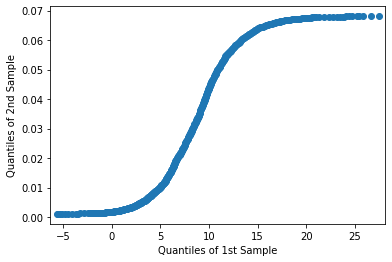

In [ ]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot_2samples
x = np.random.normal(loc=8.5, scale=2.5, size=37)
y = np.random.normal(loc=8.0, scale=3.0, size=37)
pp_x = sm.ProbPlot(col_Press)
pp_y = sm.ProbPlot(dist_MM_Press)
qqplot_2samples(pp_x, pp_y)
plt.show()

In [ ]:
plt.figure(figsize=(12, 12))
qn_first= col_T6
qn_second=dist_MM_T6
min_qn = np.min([qn_first.min(), qn_second.min()])
max_qn = np.max([qn_first.max(), qn_second.max()])
x = np.linspace(min_qn, max_qn)

plt.plot(qn_first, qn_second, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlabel(f'Currency {curr_first}')
plt.ylabel(f'Currency {curr_second}')
plt.xlim([min_qn, 400])
plt.ylim([min_qn, 400])
plt.grid(True)

# Добавление доверительных интервалов на график
plt.errorbar(
    # [25%, 50%, 75%]
    [qn_first[5], qn_first[10], qn_first[15]],
    [qn_second[5], qn_second[10], qn_second[15]],
    xerr=conf_first_list,
    yerr=conf_second_list,
    ls='none',
    capsize=3,
    elinewidth=2
)

plt.title('QQ-plot')
plt.show()

#### last one

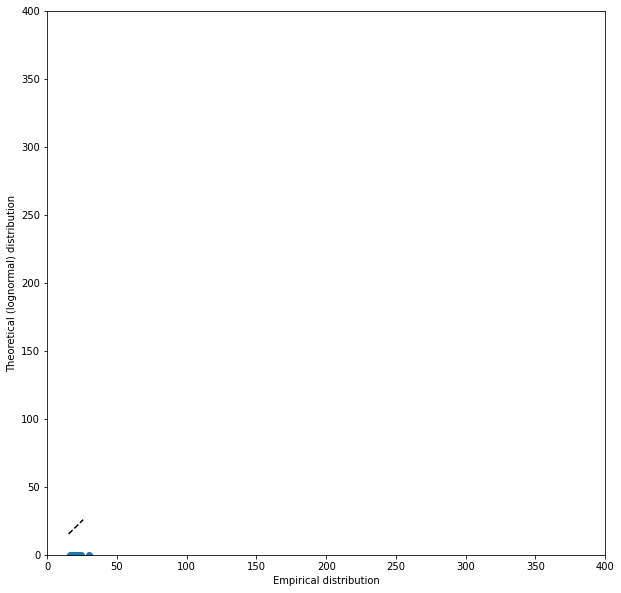

In [42]:
# Calculation of quantiles
percs = np.linspace(0, 100, 21)
qn_first = np.percentile(df_sample_colomn_energydata['T2'], percs)
qn_second=stats.nakagami  
MM_T2 = qn_second.fit(qn_first)
dist_MM_T2 = qn_second.pdf(percs, *MM_T2)
# Building a quantile biplot
plt.figure(figsize=(10, 10))
plt.plot(qn_first, dist_MM_T2, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlim(0, 400)
plt.ylim(0, 400)
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (lognormal) distribution')

plt.show()

#### may works

In [25]:
def trim_axs(axs, N):
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

In [29]:
import math

columns = ['T2', 'RH_2' ,'T5']
df_dist = [top_T2_YJ, top_RH_2_YJ, top_T5_YJ]

for i, col in enumerate(columns):

    feature = df_sample_colomn_energydata[col]

    fig_row = 15
    fig_col = 5

    figsize = (24,10) if fig_row > 1 else (24, 5)
    fig, ax = plt.subplots(fig_row, fig_col, figsize=figsize, sharey=True)
    fig.suptitle('QQ-Plot {} Top 3 Distribution'.format(col), fontsize=15, fontweight='bold')

    axs = trim_axs(ax, len(df_dist[i]))

    # percentile data
    percs = np.linspace(0,100,21)
    qn_feature = np.percentile(feature, percs)    
    x = np.linspace(np.min(feature), np.max(feature))

    for ax, row in zip(axs, df_dist[i].iterrows()):
        
        row = row[1]
        dist = getattr(stats, row['distribution'])
        params = row['{}_params'.format(columns[i])]
        
        # theoritical distribution percentile
        qn_dist = dist.ppf(percs / 100.0, *params)

        # plot QQ-Plot
        ax.plot(qn_feature, qn_dist, ls='', marker='o')
        ax.plot(x, x, color='k', ls='--')

        # set XY label
        ax.set_xlabel('Empirical distribution')
        ax.set_ylabel('Theoritical ({}) distribution'.format(row['distribution']))    
        
        # set plot title
        ax.text(0,ax.get_ylim()[1] - 0.05, 'p-value: {:.4f}'.format(row[columns[i]+'_kstest']))
        ax.text(0,ax.get_ylim()[1] - 0.1, 'chi2: {:.4f}'.format(row[columns[i]+'_chi2']))        
        
        # 'p-value: {:.2f}'.format(row[columns[i]+'_kstest'])
        ax.set_title('{} distribution'.format(row['distribution']))   

plt.tight_layout()
plt.show()

<Figure size 1728x720 with 0 Axes>

<Figure size 1728x720 with 0 Axes>

<Figure size 1728x720 with 0 Axes>

## Step 5 again

In [5]:
import seaborn as sns

In [16]:
params_lognorm

(0.30929936525364515, 13.396061619630274, 6.621083650622204)

s = 0.30929936525364515, loc = 13.396061619630274, scale = 6.621083650622204


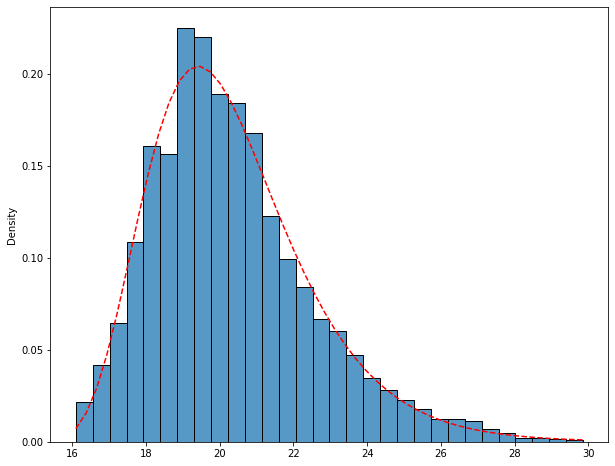

In [9]:
plt.figure(figsize=(10, 8))
col=df_sample_colomn_energydata[df_sample_colomn_energydata.columns[0]].to_numpy()
x = np.linspace(col.min(), col.max())
params_lognorm = stats.lognorm.fit(col)
print(f's = {params_lognorm[0]}, loc = {params_lognorm[1]}, scale = {params_lognorm[2]}')
sns.histplot(col, kde=False, bins=30, stat='density', label=f'Average price in dollars')
pdf = stats.lognorm.pdf((x - params_lognorm[1]) / params_lognorm[2], params_lognorm[0]) / params_lognorm[2]
plt.plot(x, pdf, 'r--')
plt.show()

In [10]:
ks = stats.kstest(col, 'lognorm', params_lognorm, N=100)
cm = stats.cramervonmises(col, 'lognorm', params_lognorm)
print(ks)
print(cm)

KstestResult(statistic=0.01910374113528035, pvalue=1.0944175481335614e-06)
CramerVonMisesResult(statistic=1.1339001984358272, pvalue=0.001198524346925467)


In [ ]:
dist_name = ['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford',\
        'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma',\
        'dweibull', 'erlang', 'expon', 'exponnorm', 'exponweib', 'exponpow', 'f',\
        'fatiguelife', 'foldcauchy', 'foldnorm', 'genlogistic', 'gennorm', 'genpareto',\
        'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 'genhalflogistic',\
        'genhyperbolic', 'geninvgauss', 'gilbrat', 'gompertz', 'gumbel_r', 'gumbel_l',\
        'halfcauchy', 'halflogistic', 'halfnorm', 'halfgennorm', 'hypsecant', 'invgamma',\
        'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa4', 'kappa3', 'ksone',\
        'kstwobign', 'laplace', 'laplace_asymmetric', 'levy', 'levy_l',\
        'logistic', 'loggamma', 'loglaplace', 'lognorm', 'loguniform',\
        'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncx2', 'ncf', 'nct', 'norm',\
        'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm',\
        'rdist', 'rayleigh', 'rice', 'recipinvgauss', 'semicircular', 'skewcauchy',\
        'skewnorm', 't', 'trapezoid', 'triang', 'truncexpon',\
        'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'vonmises_line', 'wald',\
        'weibull_min', 'weibull_max', 'wrapcauchy']

df_dist = []
for d in dist_name:
    print(d)
    dct = {
            'distribution': d
    }
    for c in df_sample_colomn_energydata.columns[0:]:
        try:
            dist = getattr(stats, d)
             # boxcox
            feature = stats.boxcox(df_sample_colomn_energydata[c])
            param = dist.fit(feature[0])
            _, kstest = stats.kstest(feature[0], d, param, N=100)
            _, chisq = stats.chisquare(feature[0])

            dct['{}_params'.format(c)] = param
            dct['{}_kstest'.format(c)] = kstest
            dct['{}_chi2'.format(c)] = chisq
        except:
            continue
    
    df_dist.append(dct)
    
df_dist = pd.DataFrame(df_dist)

In [13]:

from functools import partial

<AxesSubplot:ylabel='Density'>

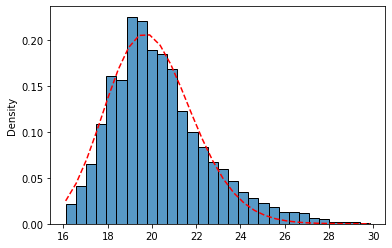

In [19]:
def lognorm_pdf(x, mu, sigma):
    exp = np.exp(-(np.log(x) - mu)**2 / (2 * sigma ** 2))

    frac =  (x * sigma * (2 * np.pi) ** 0.5)
    return exp / frac

col=df_sample_colomn_energydata[df_sample_colomn_energydata.columns[0]].to_numpy()
hist, bin_edges = np.histogram(col, bins=30, density=True)

freq = [hist[i] for i in range(len(hist) - 1)]
positions = [(bin_edges[i] + bin_edges[i+1])/2  for i in range(len(hist) - 1)]
res_lsq, _ = scipy.optimize.curve_fit(lognorm_pdf, positions, freq)
mu, sigma = res_lsq
x = np.linspace(np.min(col), np.max(col), 30, dtype=np.float64)
theo_probs = list(map(partial(lognorm_pdf, sigma=sigma, mu = mu), x))
plt.plot(x, theo_probs, 'r--')
sns.histplot(col, kde=False, bins=30, stat='density', label=f'Average price in dollars')

In [15]:
res_lsq

array([2.98900088, 0.09755556])

In [21]:
ks = scipy.stats.kstest(col, 'lognorm', res_lsq, N=30)
cm = scipy.stats.cramervonmises(col, 'lognorm', res_lsq)
print(ks)
print(cm)
# pvalue >= 0.05

KstestResult(statistic=0.8232049743180698, pvalue=0.0)
CramerVonMisesResult(statistic=3865.3335861424794, pvalue=5.089347026032698e-07)


In [10]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

    #sorting for kstest
    # Create models from data
def best_fit_distribution_ks(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    best_distributions = []

    # Estimate distribution parameters from data
    for ii, distribution in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):

        print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribution ))
        distribution_name=distribution
        distribution = getattr(st, distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                
                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]
                
                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                _, kstest= scipy.stats.kstest(data, distribution_name, params, N=bins)
                
                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                best_distributions.append((distribution, params, kstest))
                print(best_distributions)
        
        except Exception:
            pass
    
    return sorted(best_distributions, key=lambda x:x[2],reverse=True)

  1 / 104: ksone
[(<scipy.stats._continuous_distns.ksone_gen object at 0x000001E2DDBDA688>, (1.04047665239305, 16.099999990765085, 13.756666682040532), 0.0)]
  2 / 104: kstwo
Exception type : ValueError 
Exception message : Iteration of zero-sized operands is not enabled
Stack trace : ['File : C:\\Users\\User\\AppData\\Local\\Temp/ipykernel_13208/3650577934.py , Line : 108, Func.Name : best_fit_distribution_ks, Message : params = distribution.fit(data)', 'File : C:\\Users\\User\\AppData\\Roaming\\Python\\Python37\\site-packages\\scipy\\stats\\_distn_infrastructure.py , Line : 2496, Func.Name : fit, Message : vals = optimizer(func, x0, args=(ravel(data),), disp=0)', 'File : C:\\Users\\User\\AppData\\Roaming\\Python\\Python37\\site-packages\\scipy\\optimize\\optimize.py , Line : 580, Func.Name : fmin, Message : res = _minimize_neldermead(func, x0, args, callback=callback, **opts)', 'File : C:\\Users\\User\\AppData\\Roaming\\Python\\Python37\\site-packages\\scipy\\optimize\\optimize.py , 

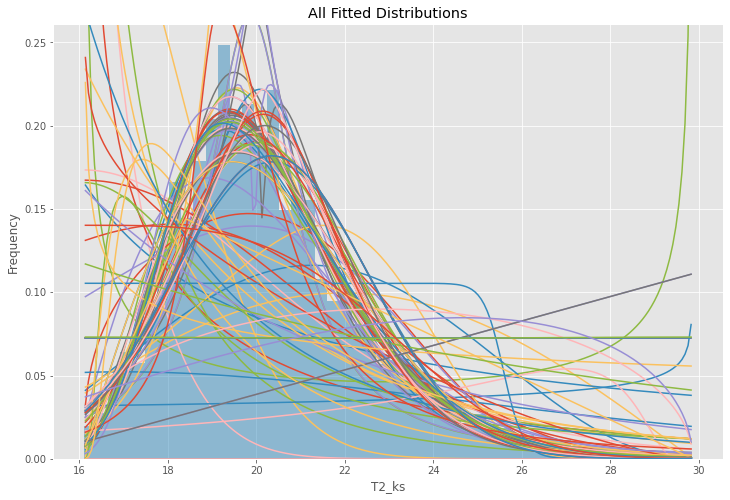

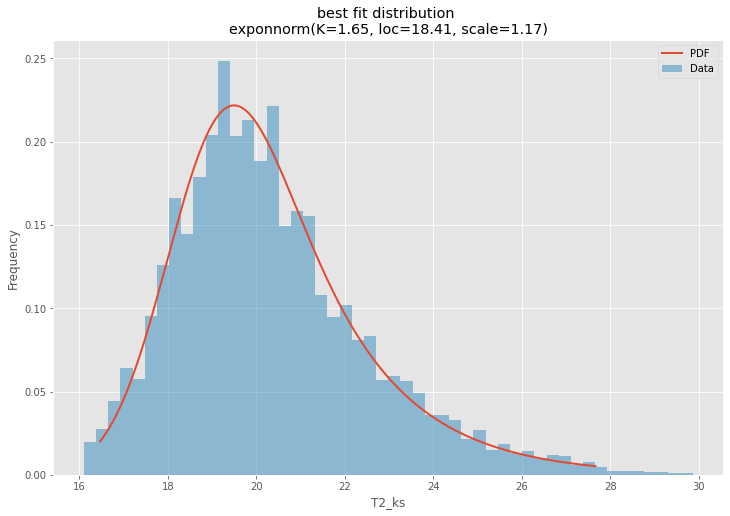

In [8]:
# Load data from statsmodels datasets
data_T2_ks = df_sample_colomn_energydata[df_sample_colomn_energydata.columns[0]]#pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data_T2_ks.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_distibutions_T2_ks = best_fit_distribution_ks(data_T2_ks, 200, ax)
best_dist_T2_ks = best_distibutions_T2_ks[0]

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'All Fitted Distributions')
ax.set_xlabel(u'T2_ks')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf_T2_ks = make_pdf(best_dist_T2_ks[0], best_dist_T2_ks[1])

# Display
plt.figure(figsize=(12,8))
ax = pdf_T2_ks.plot(lw=2, label='PDF', legend=True)
data_T2_ks.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names_T2_ks = (best_dist_T2_ks[0].shapes + ', loc, scale').split(', ') if best_dist_T2_ks[0].shapes else ['loc', 'scale']
param_str_T2_ks = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names_T2_ks, best_dist_T2_ks[1])])
dist_str_T2_ks = '{}({})'.format(best_dist_T2_ks[0].name, param_str_T2_ks)

ax.set_title(u'best fit distribution \n' + dist_str_T2_ks)
ax.set_xlabel(u'T2_ks')
ax.set_ylabel('Frequency')

ks_T2_ks = scipy.stats.kstest(data_T2_ks, best_dist_T2_ks[0].name , best_dist_T2_ks[1], N=30)
cm_T2_ks = scipy.stats.cramervonmises(data_T2_ks, best_dist_T2_ks[0].name, best_dist_T2_ks[1])
print(ks_T2_ks)
print(cm_T2_ks)

In [15]:
print(best_distibutions_T2_ks)

[]


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


<AxesSubplot:xlabel='T2', ylabel='Density'>

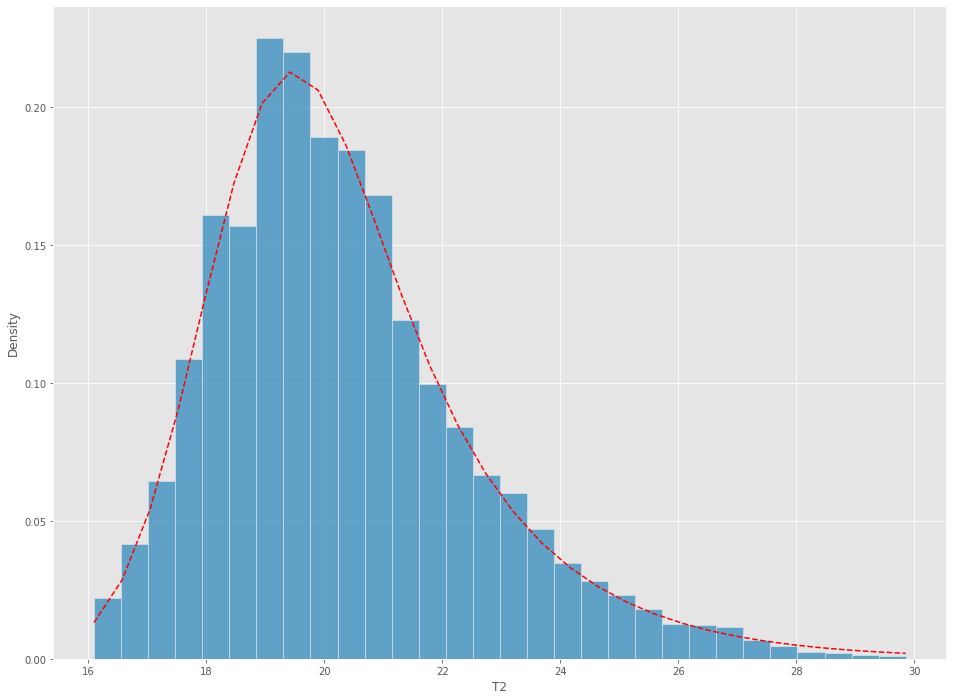

In [31]:
import scipy.special as sse
from scipy.optimize import curve_fit
from functools import partial

import seaborn as sns
data_T2_ks = df_sample_colomn_energydata[df_sample_colomn_energydata.columns[0]]#pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())

def fit_func(x, l, s, m):
    return 0.5*l*np.exp(0.5*l*(2*m+l*s*s-2*x))*sse.erfc((m+l*s*s-x)/(np.sqrt(2)*s)) # exponential gaussian
hist, bin_edges = np.histogram(data_T2_ks, bins=30, density=True)
freq = [hist[i] for i in range(len(hist) - 1)]
positions = [(bin_edges[i] + bin_edges[i+1])/2  for i in range(len(hist) - 1)]
res_lsq, _ = scipy.optimize.curve_fit(fit_func, positions, freq)
K, sigma ,mu = res_lsq
x = np.linspace(np.min(data_T2_ks), np.max(data_T2_ks), 30, dtype=np.float64)
theo_probs = list(map(partial(fit_func, l=K,s=sigma,m=mu), x))
plt.plot(x, theo_probs, 'r--')
sns.histplot(data_T2_ks, kde=False, bins=30, stat='density', label=f'Average price in dollars')

In [34]:
ks_least_square_T2 = scipy.stats.kstest(data_T2_ks, 'exponnorm' , res_lsq, N=30)
cm_least_square_T2 = scipy.stats.cramervonmises(data_T2_ks, 'exponnorm', res_lsq)
print(ks_least_square_T2)
print(cm_least_square_T2)

KstestResult(statistic=0.6225409882905351, pvalue=0.0)
CramerVonMisesResult(statistic=2034.9484968435156, pvalue=3.916743609444495e-07)


In [40]:
ks_T2_ks = scipy.stats.kstest(data_T2_ks, best_dist_T2_ks[0].name , best_dist_T2_ks[1], N=30)
cm_T2_ks = scipy.stats.cramervonmises(data_T2_ks, best_dist_T2_ks[0].name, best_dist_T2_ks[1])
print(ks_T2_ks)
print(cm_T2_ks)

KstestResult(statistic=0.013864726996696497, pvalue=0.0010040844674001886)
CramerVonMisesResult(statistic=0.6551298329608799, pvalue=0.016381222874696344)


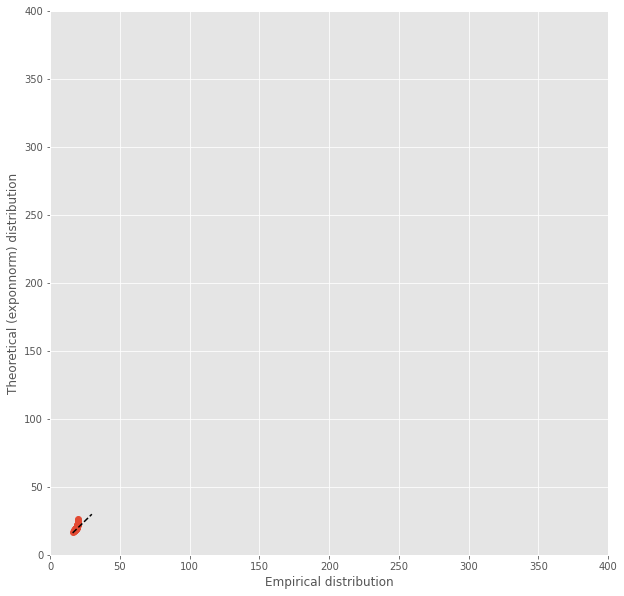

In [45]:
# Plotting a quantile biplot for empirical and theoretical (lognormal) distribution

# Calculation of quantiles
percs = np.linspace(0, 100, 41)
qn_first = np.percentile(data_T2_ks, percs)
qn_lse = scipy.stats.exponnorm.ppf(percs / 100.0, *best_dist_T2_ks[1])

# Building a quantile biplot
plt.figure(figsize=(10, 10))
plt.plot(qn_first, qn_lse, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlim(0, 400)
plt.ylim(0, 400)
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (exponnorm) distribution')

plt.show()

In [1]:
# Plotting a quantile biplot for empirical and theoretical (lognormal) distribution

# Calculation of quantiles
percs = np.linspace(0, 100, 41)
qn_first = np.percentile(data_T2_ks, percs)
qn_lse = scipy.stats.exponnorm.ppf(percs / 100.0, *best_dist_T2_ks[1])

# Building a quantile biplot
plt.figure(figsize=(10, 10))
plt.plot(qn_first, qn_lse, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlim(0, 400)
plt.ylim(0, 400)
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (exponnorm) distribution')

plt.show()

NameError: name 'np' is not defined

In [ ]:
    data.reverse()
    popt,pcov=(curve_fit(fit_func, n.linspace(0,1,100), data))
    fitted_curve=list(fit_func(n.linspace(0,1,100),popt[0],popt[1],popt[2]))
    data.reverse()
    fitted_curve.reverse()